In [4]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data', "spaceNet","full-spaceNet-cleaned")
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [5]:
# def npz_opener(path):
#     return np.load(path)["arr_0"]
# npz_opener(file_list[0])

# That did not work, this is something I think works the same
def npz_opener(path):
    npz_file = np.load(path)
    array_data = npz_file[npz_file.files[0]]
    return array_data

npz_opener(file_list[0])


array([[[-0.6244557, -0.8633704, -0.8232738],
        [-0.8534092, -1.1257774, -0.9732074],
        [-0.5099789, -0.732167, -0.72331804],
        ...,
        [-3.7153282, -4.0778546, -3.172234],
        [-3.9442818, -4.1434565, -3.3721457],
        [-3.1429443, -3.4874392, -2.822389]],

       [[-1.2540778, -1.5849893, -1.3730304],
        [-1.425793, -1.7817945, -1.5229641],
        [-0.8534092, -1.1257774, -0.9732074],
        ...,
        [-3.5436132, -4.012253, -3.1222563],
        [-4.0587587, -4.3402615, -3.4721014],
        [-4.34495, -5.0618806, -3.9718802]],

       [[-1.2540778, -1.5849893, -1.3730304],
        [-1.1968395, -1.5849893, -1.3230525],
        [-0.8534092, -1.1257774, -0.9732074],
        ...,
        [-3.9442818, -4.27466, -3.3721457],
        [-3.5436132, -3.9466512, -3.1222563],
        [-2.3988454, -2.7002187, -2.2226543]],

       ...,

       [[-2.913991, -3.6186428, -2.9723227],
        [-2.5705607, -3.1594307, -2.5724995],
        [-2.5705607, -3.093829,

# Gray

In [9]:
coeffs, mags = convert_fourier_list(data_dir, c = 3, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)

In [10]:
n= len(real_data)
n

136040000

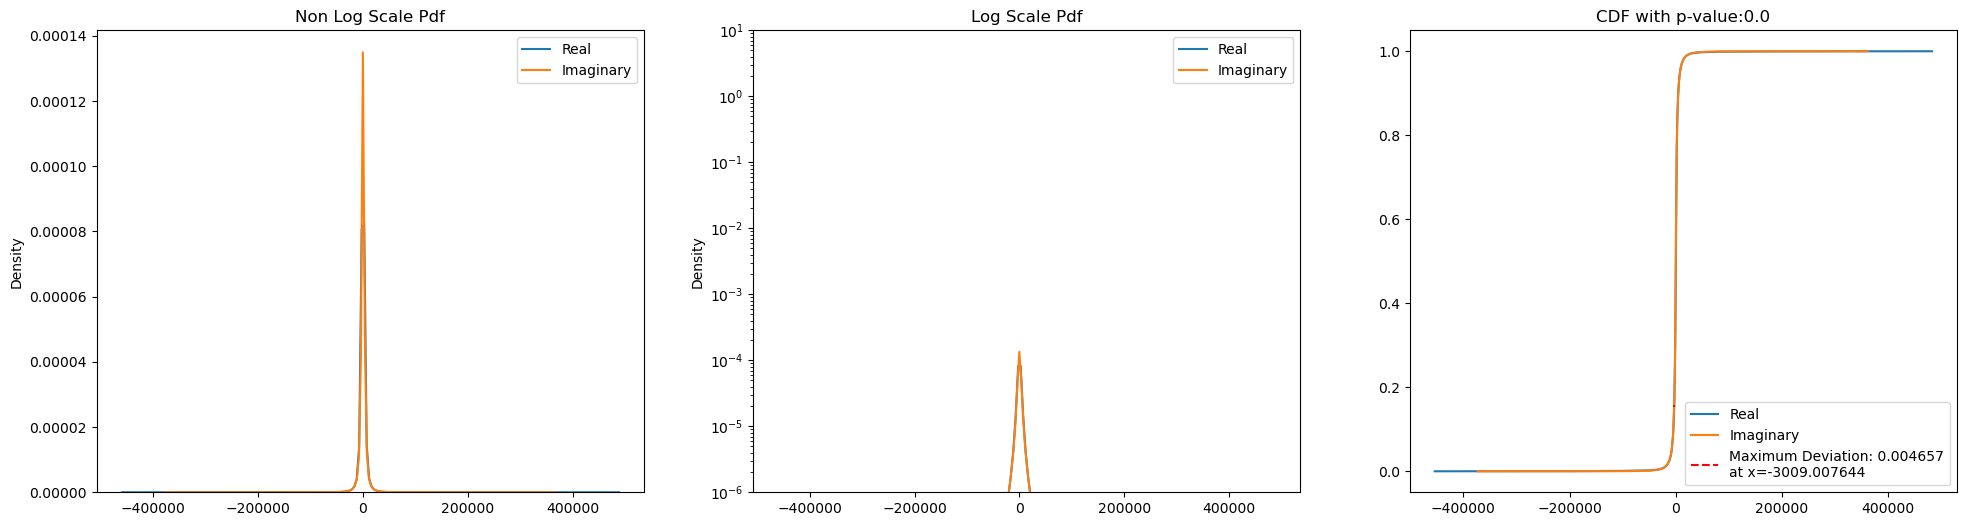

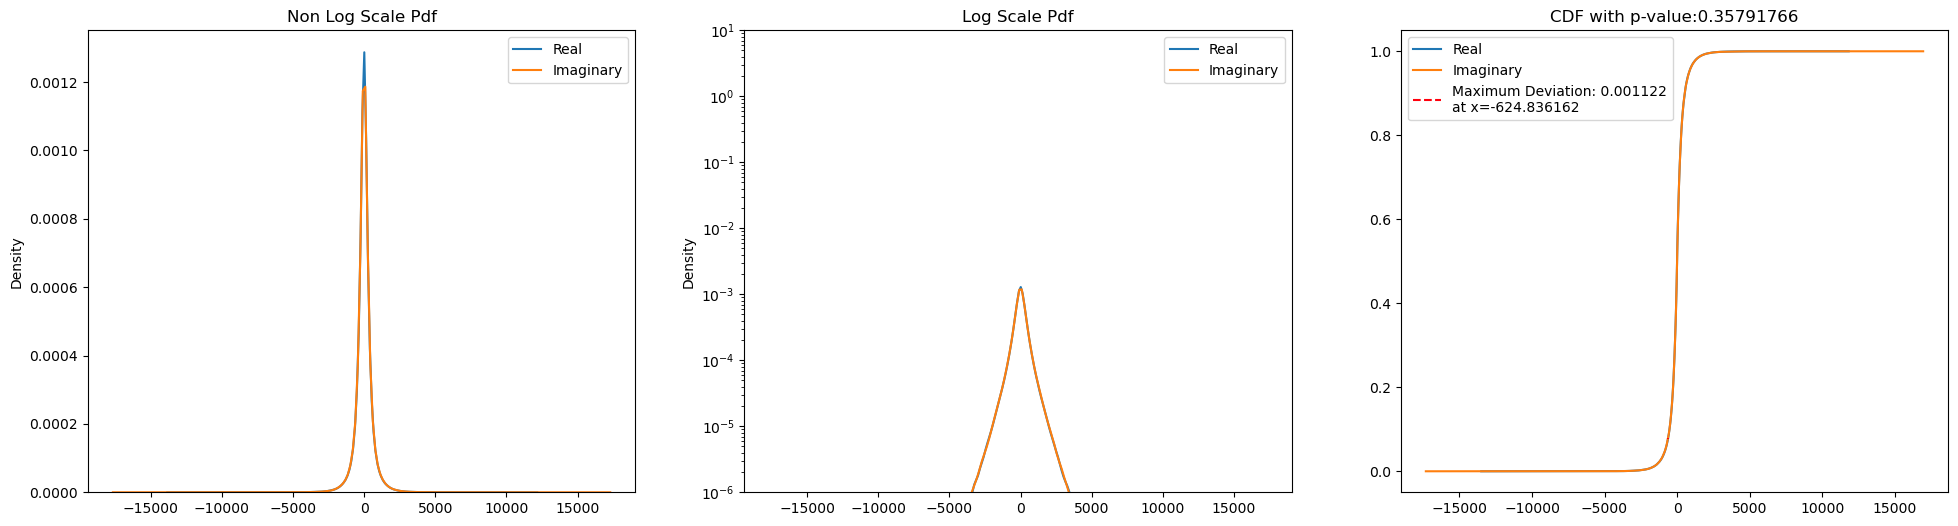

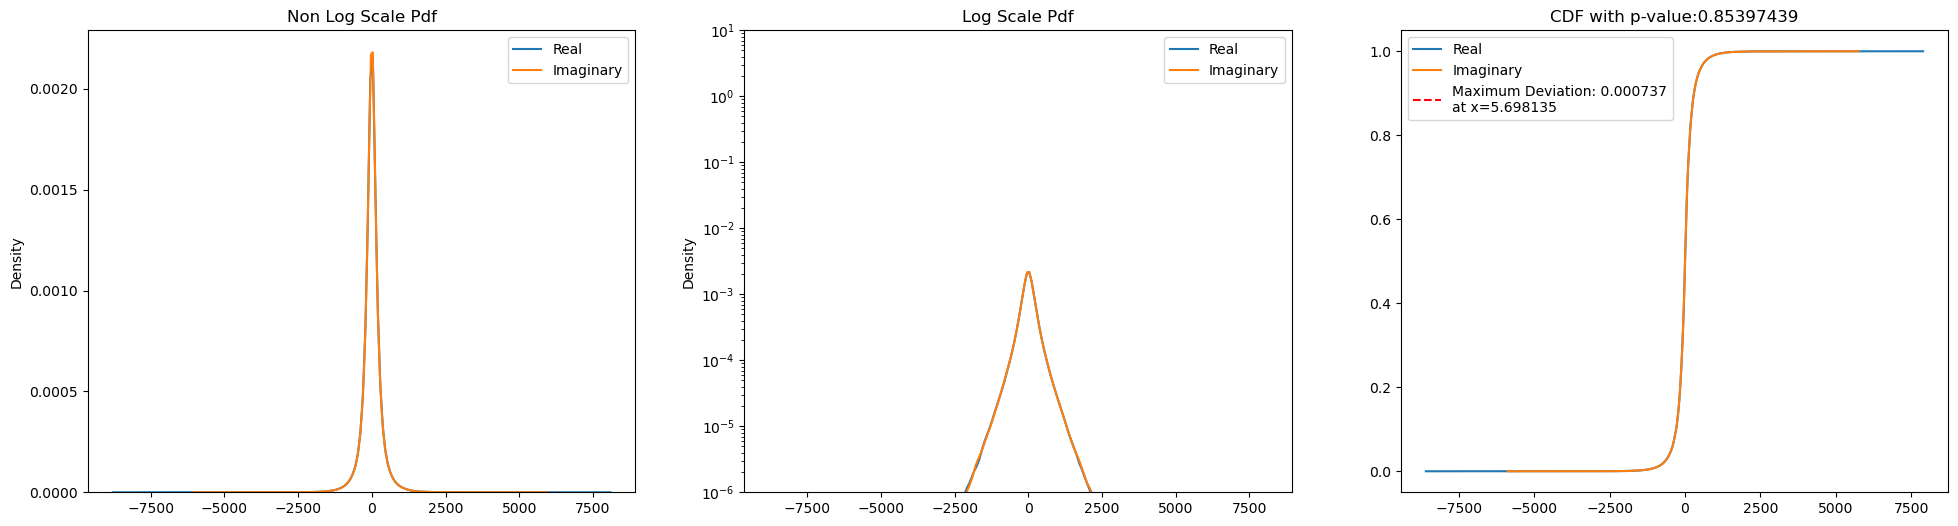

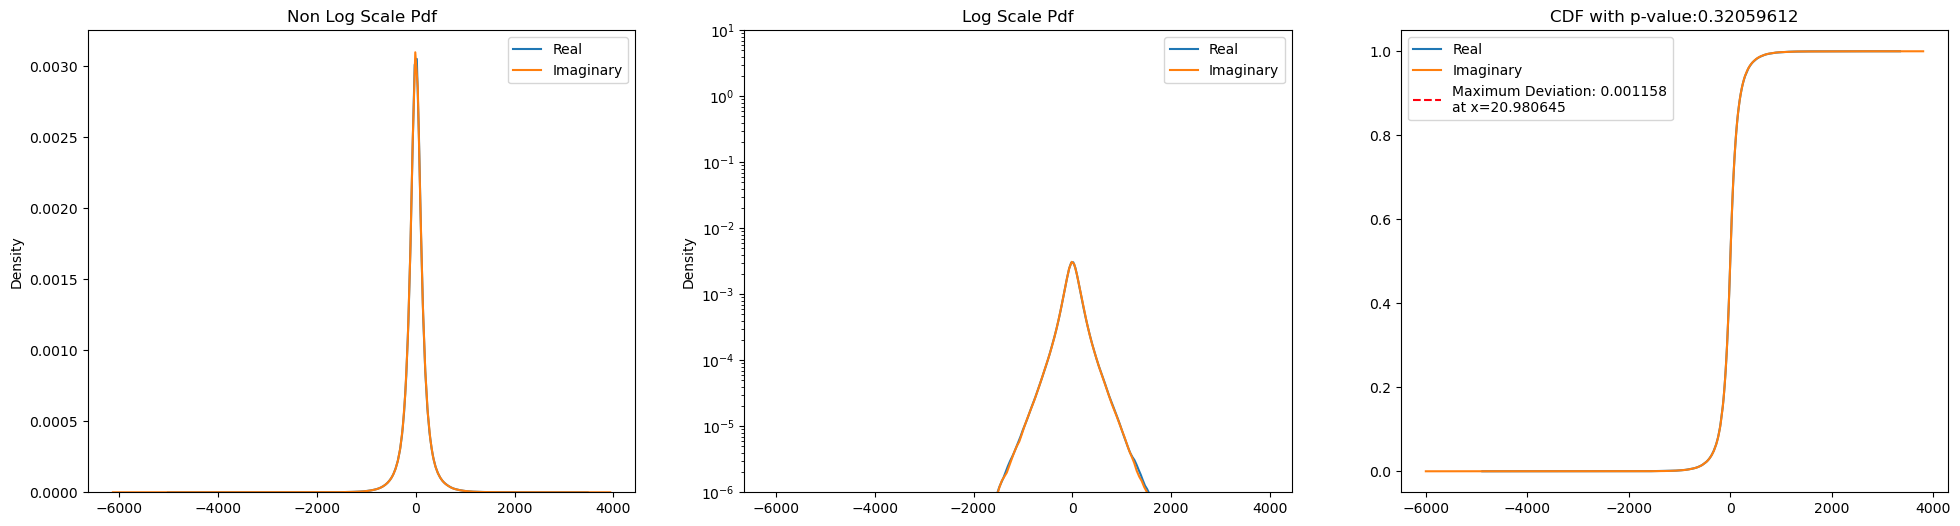

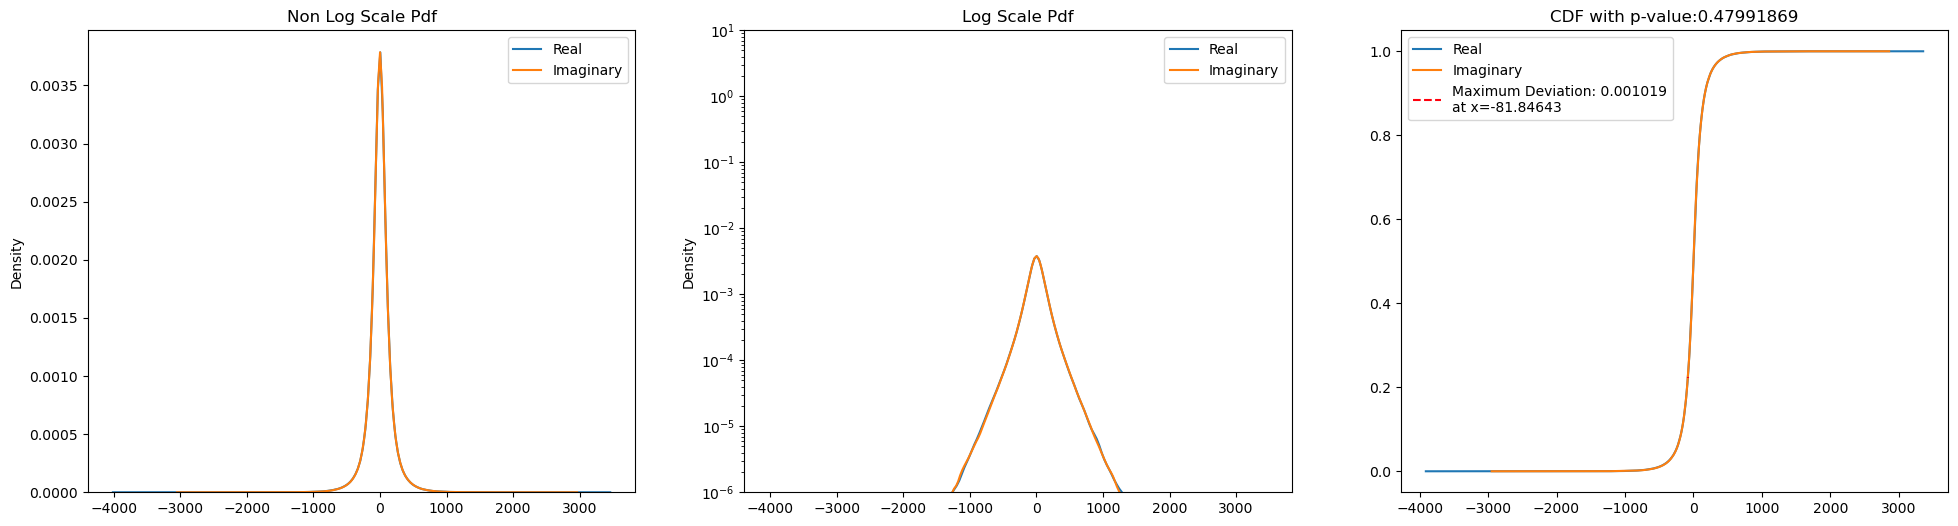

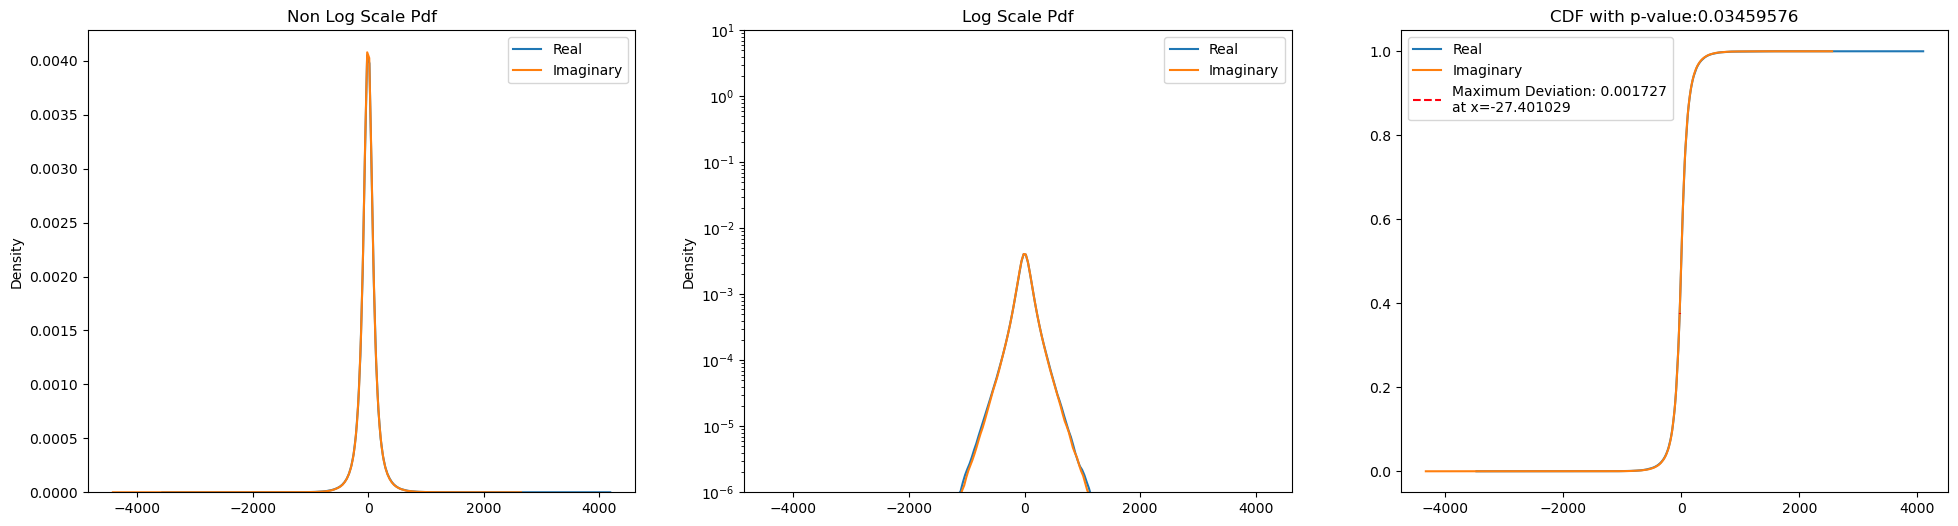

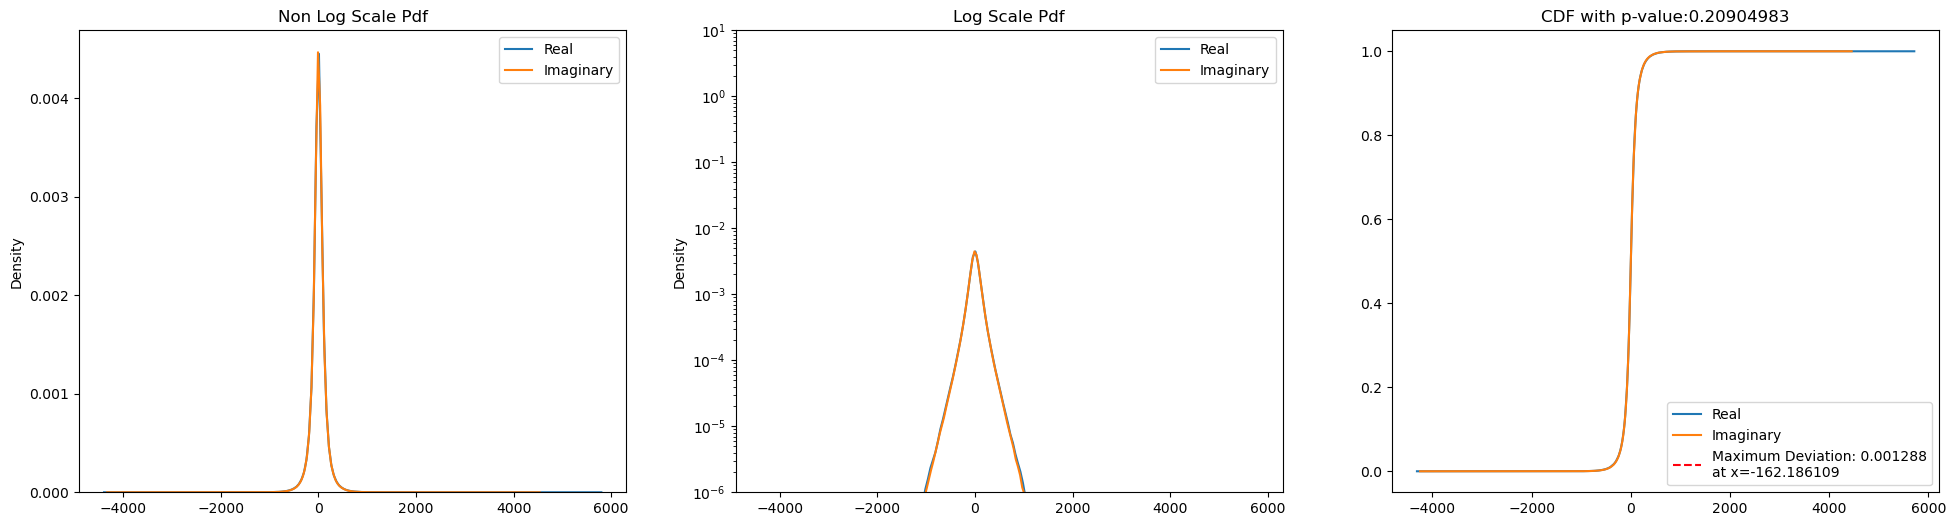

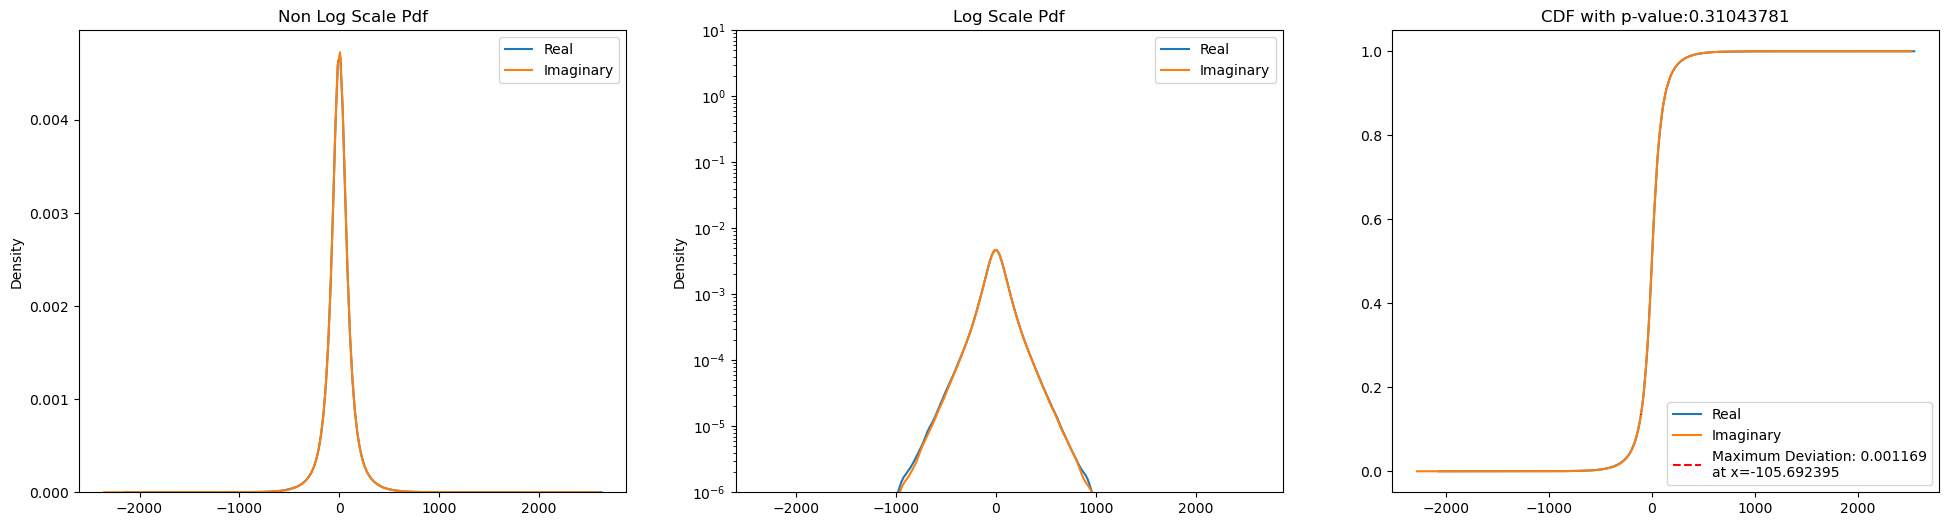

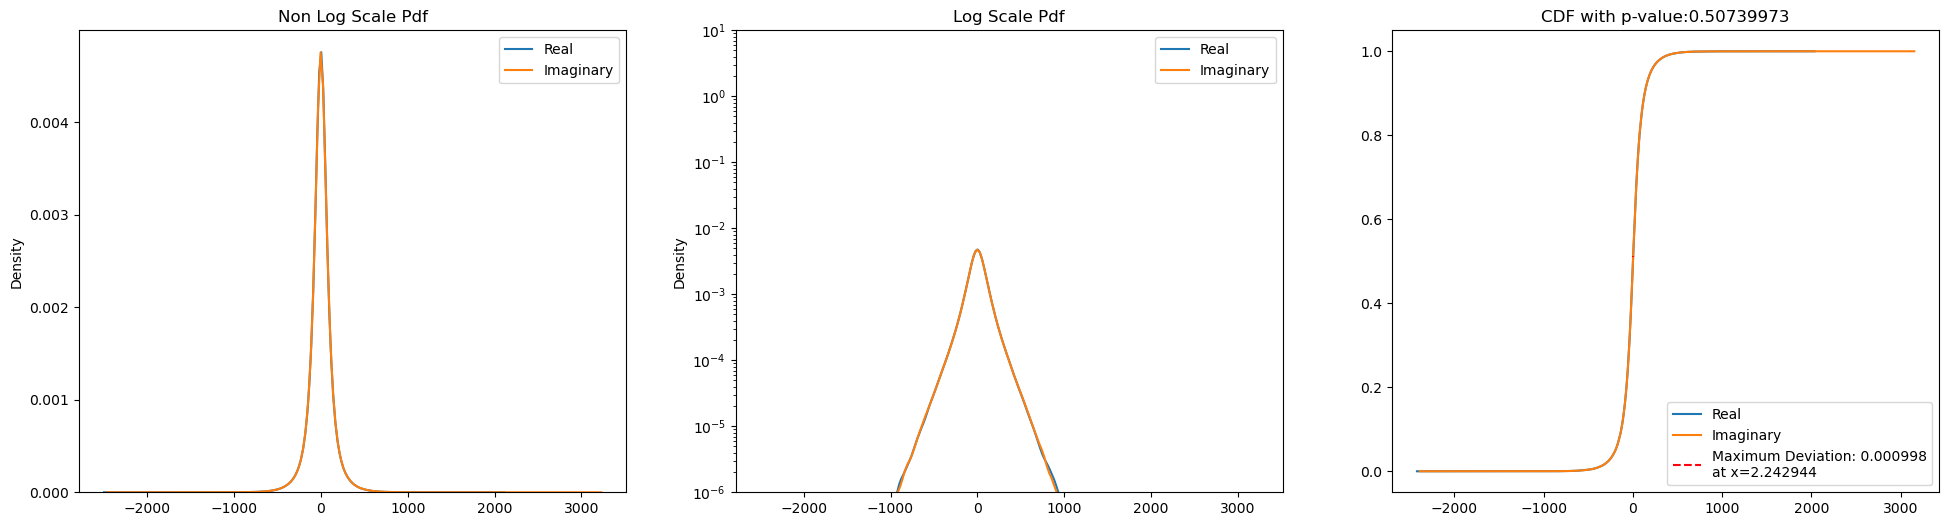

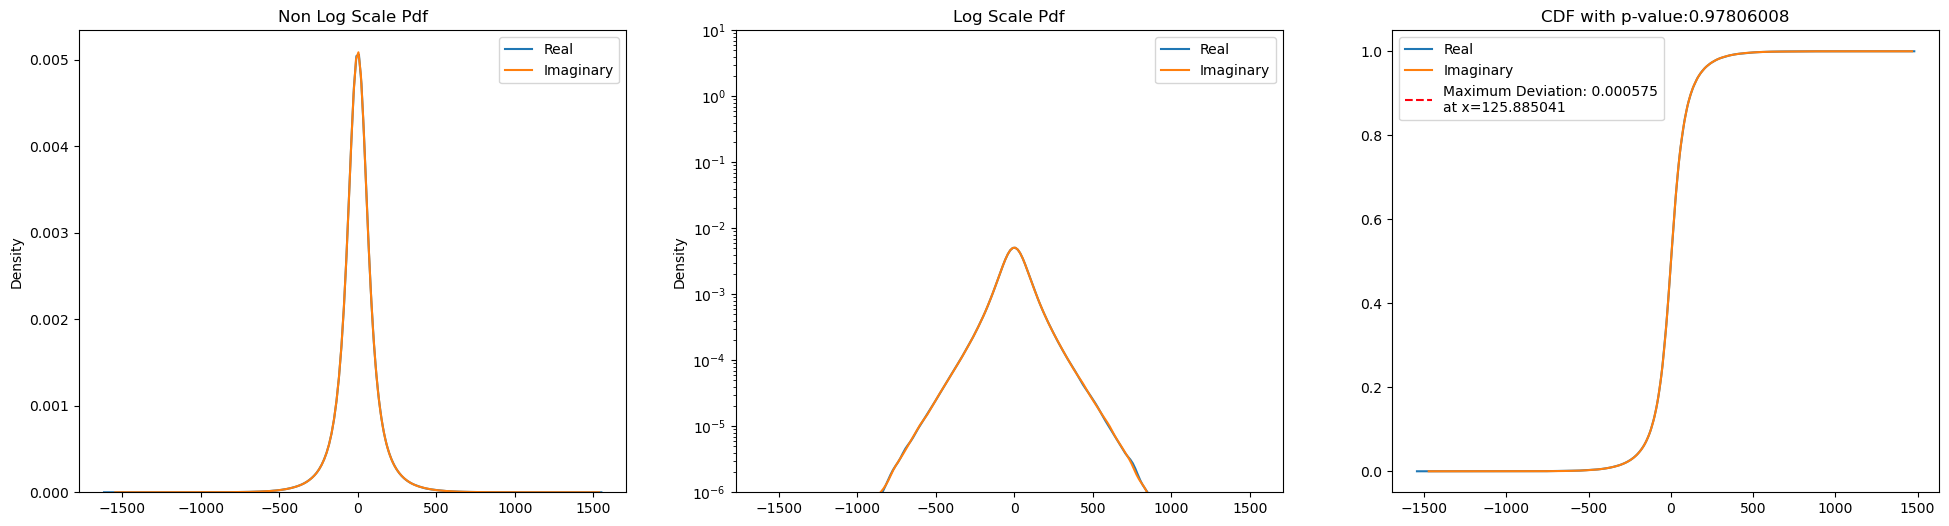

In [11]:
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Red

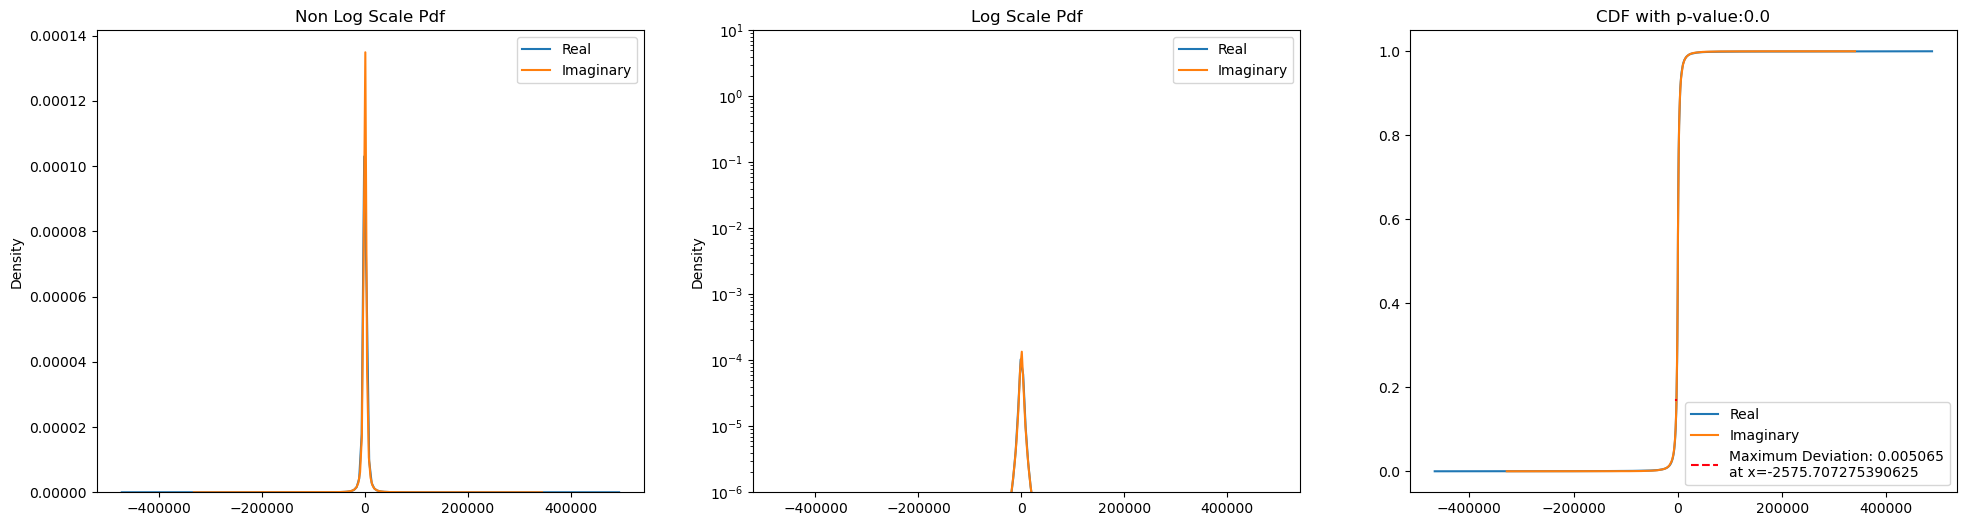

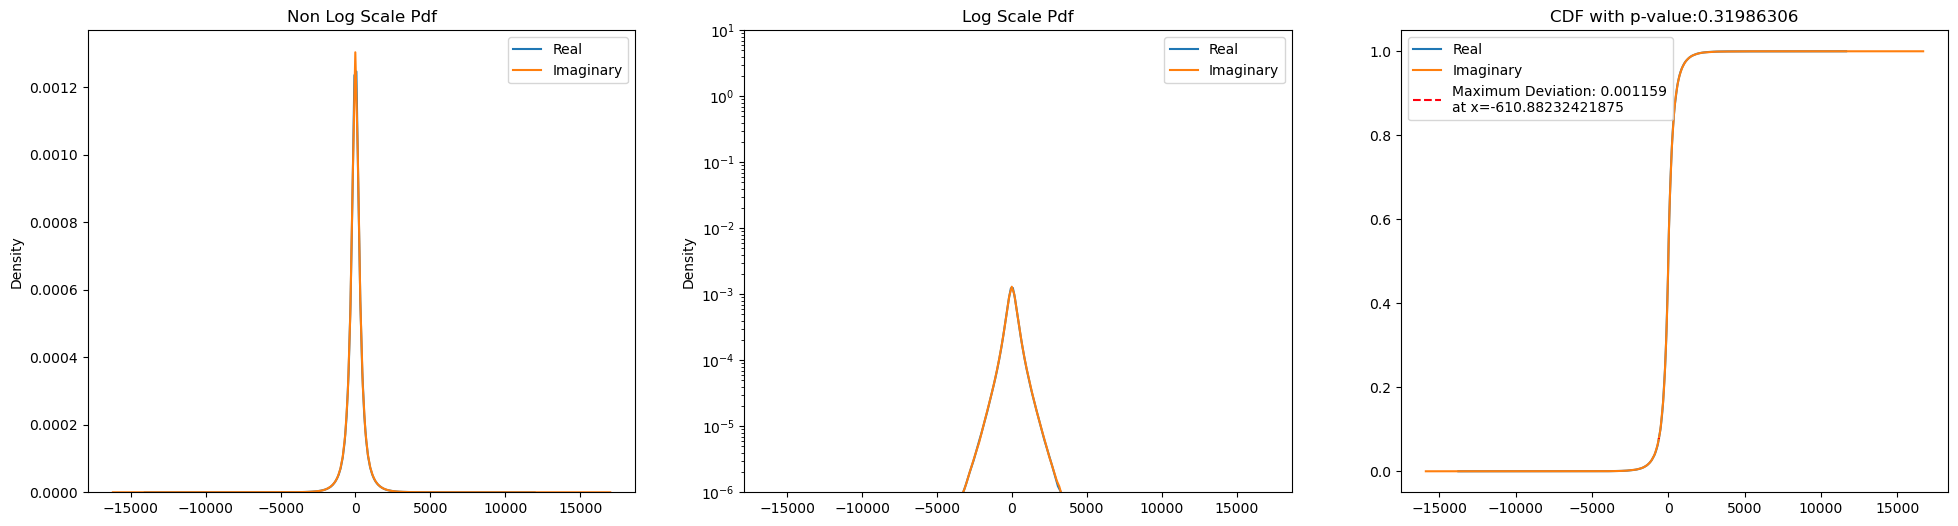

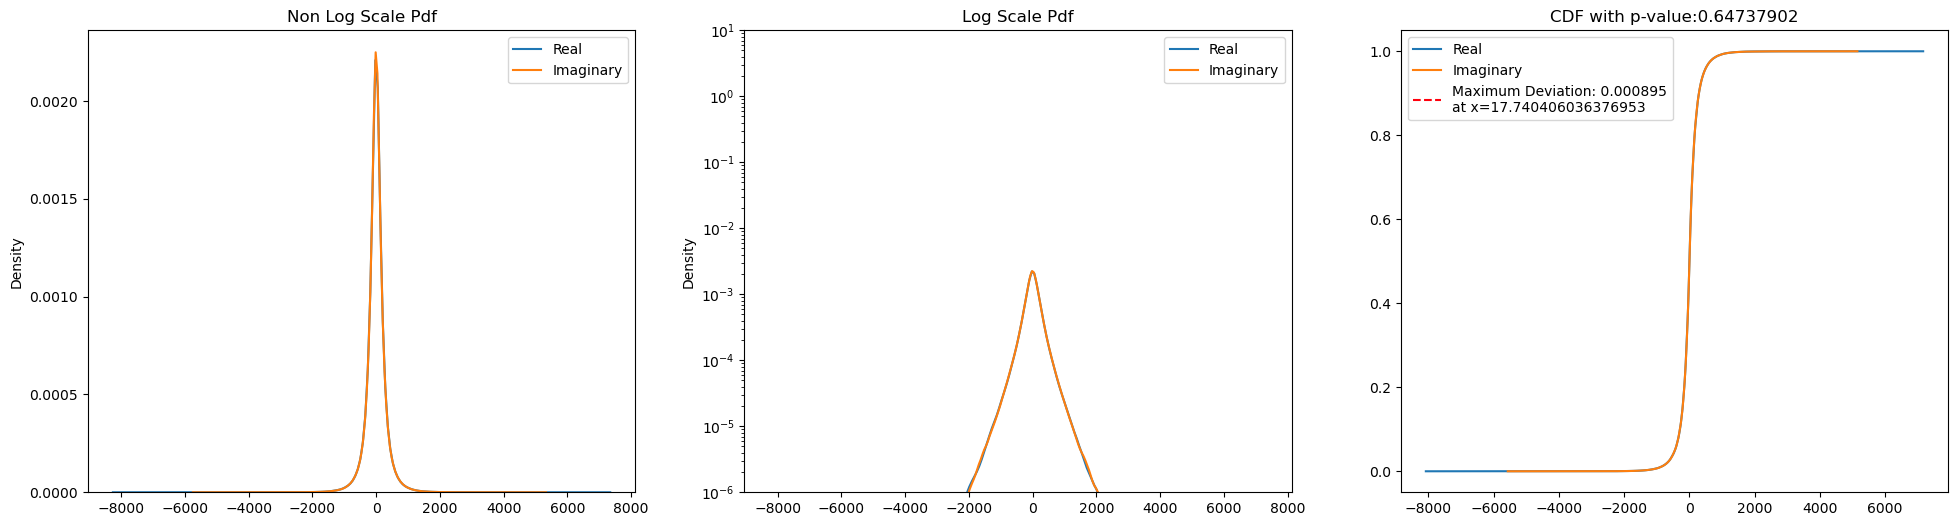

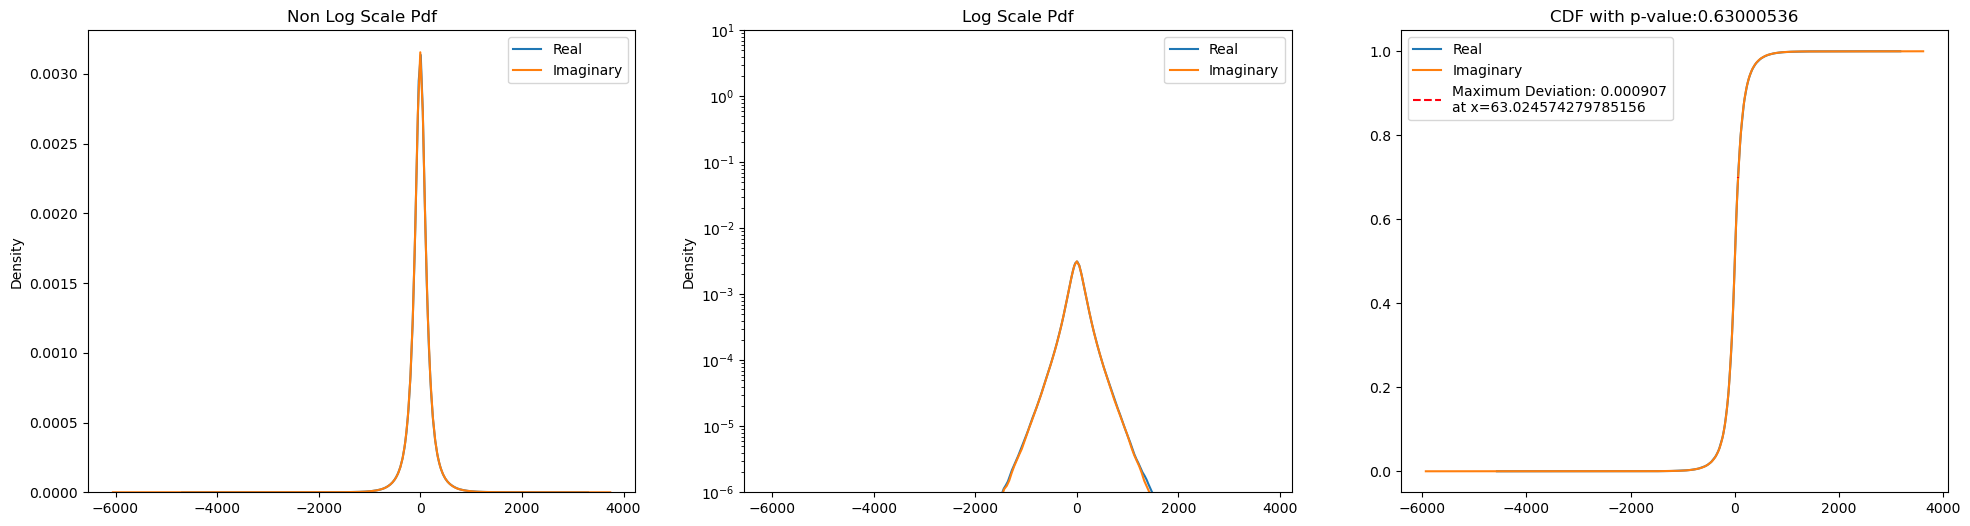

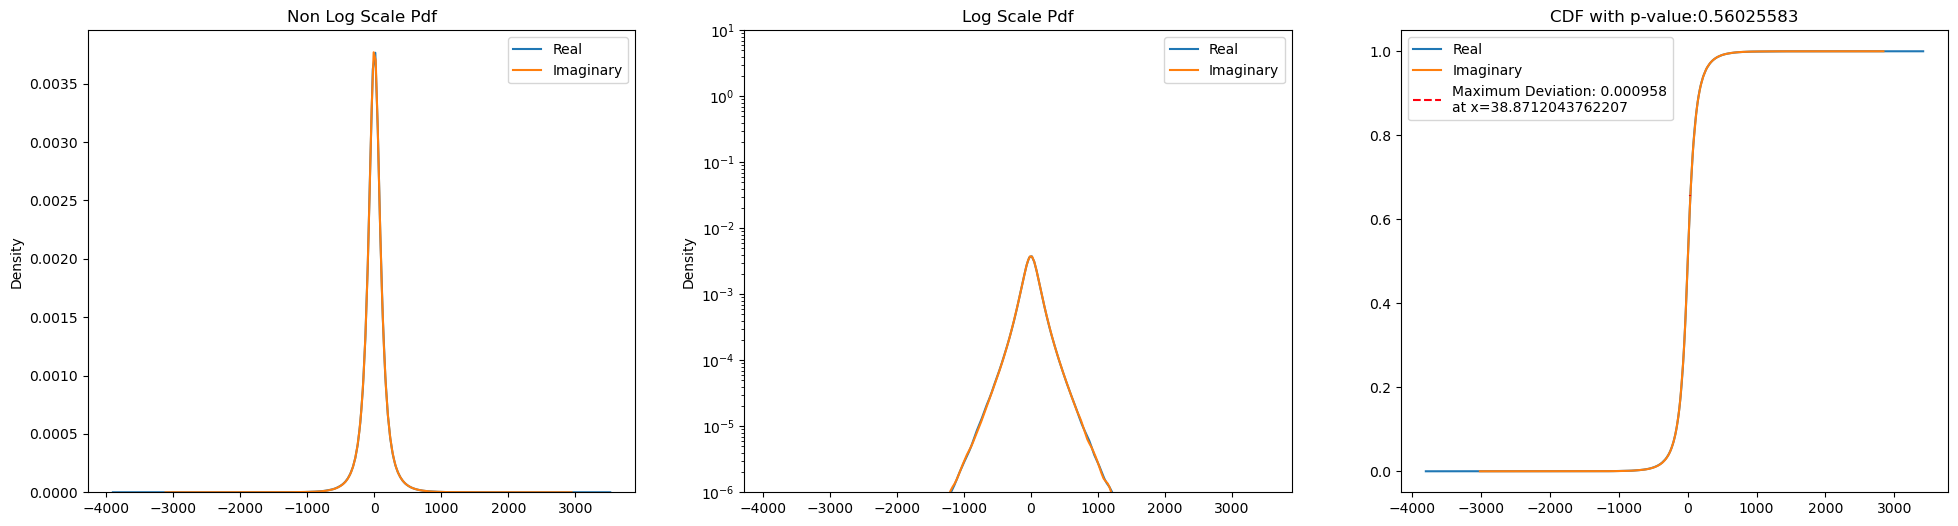

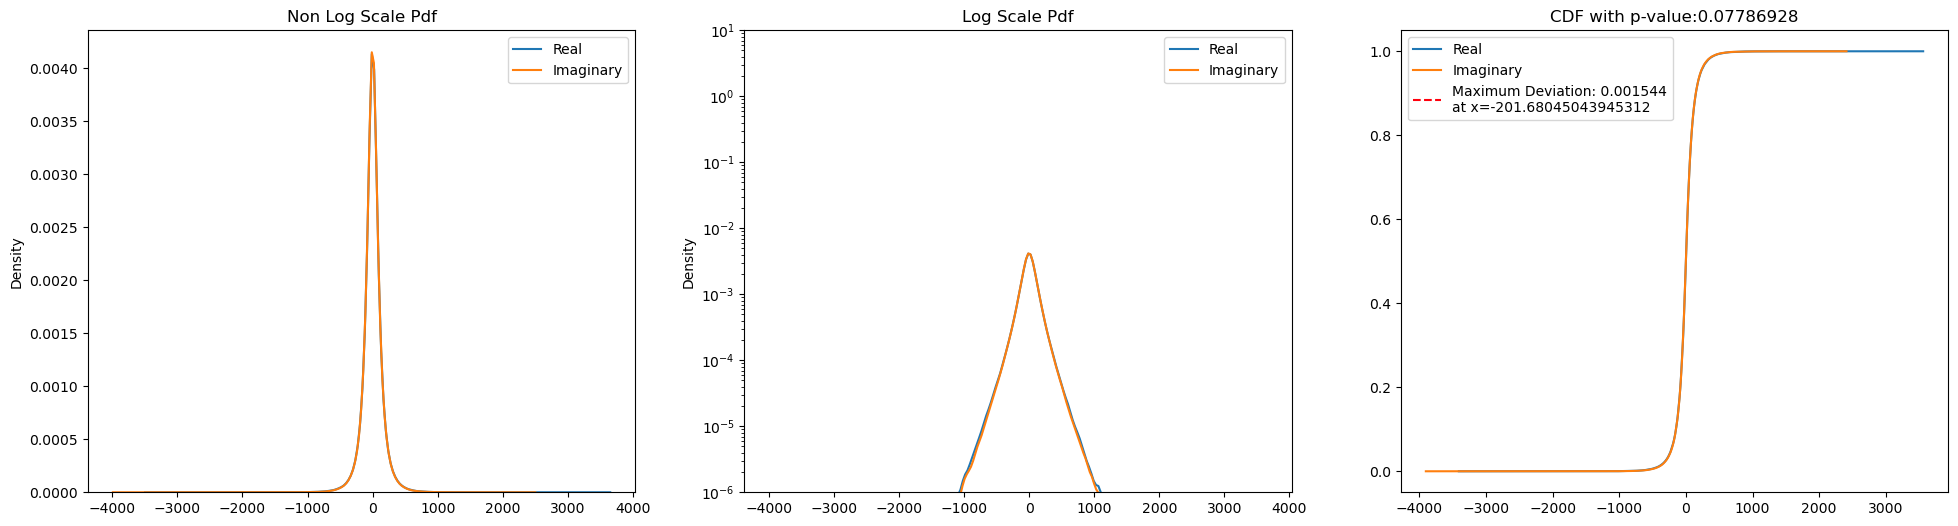

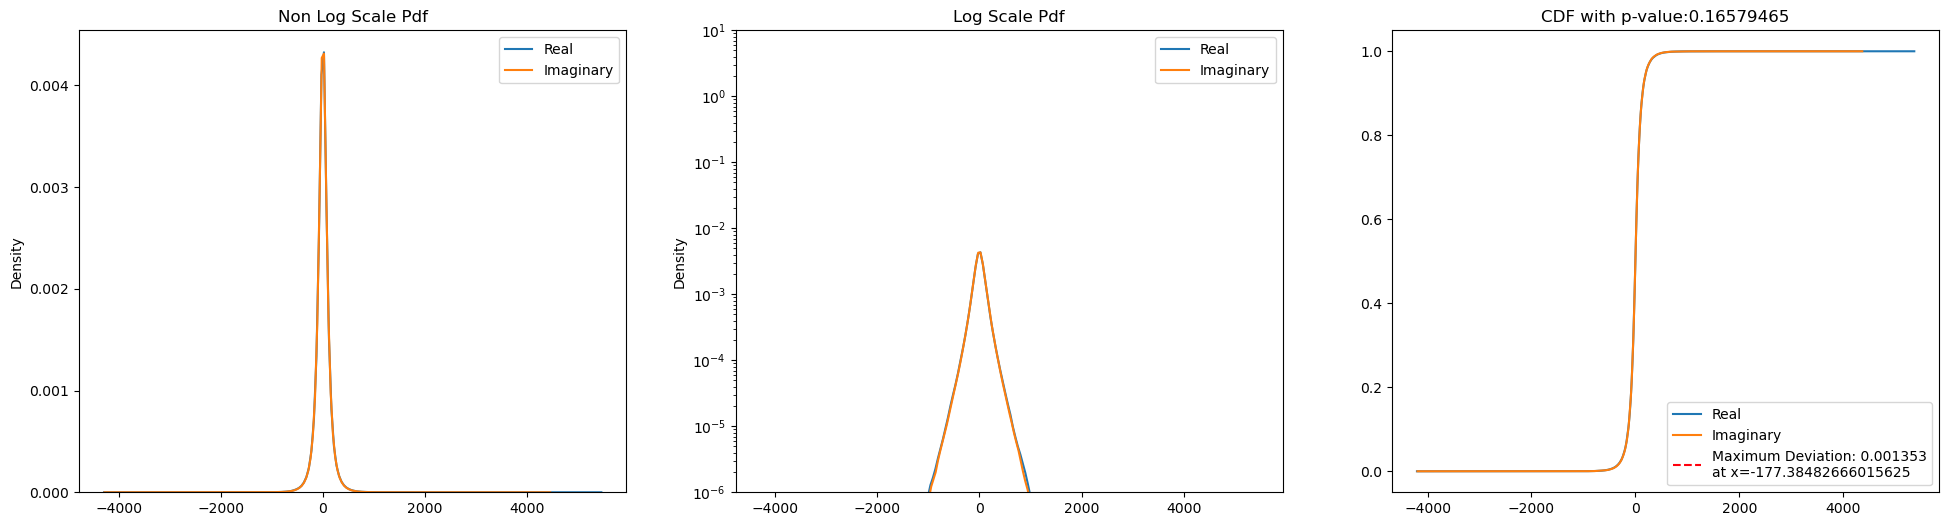

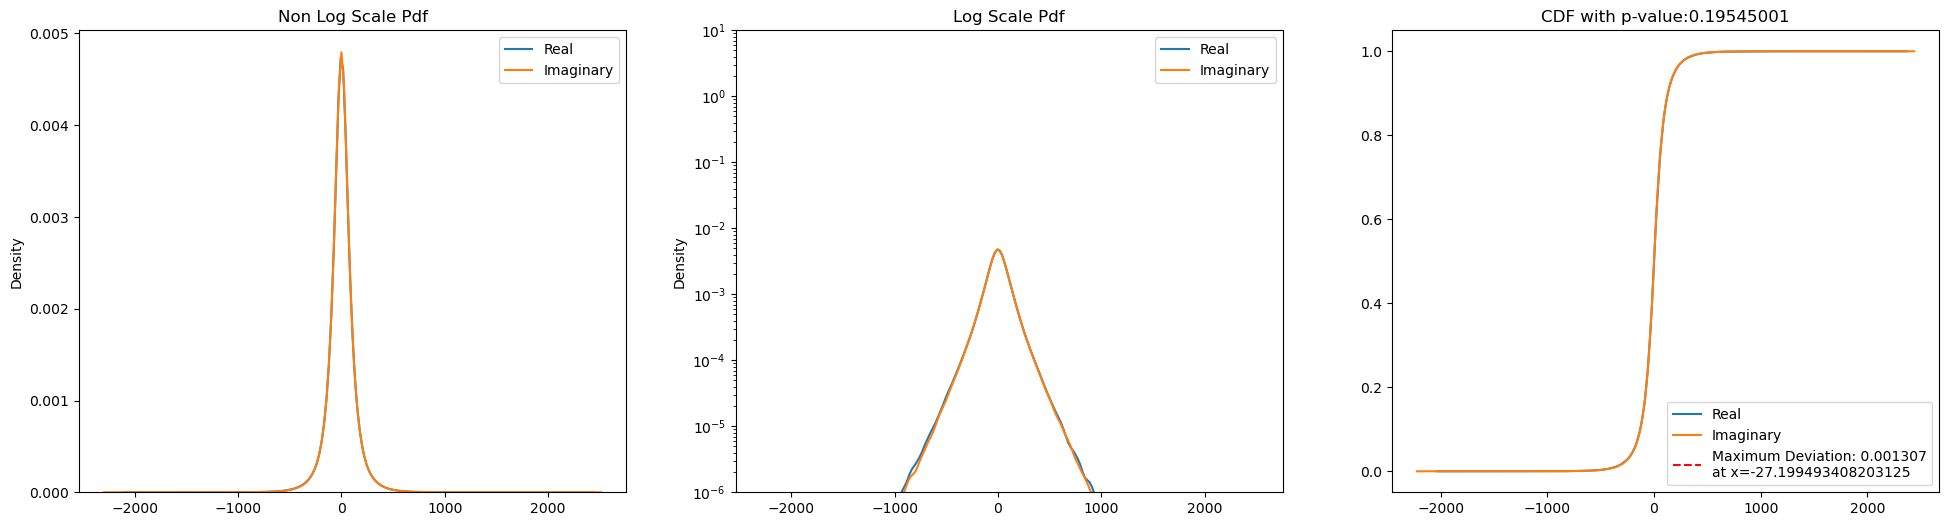

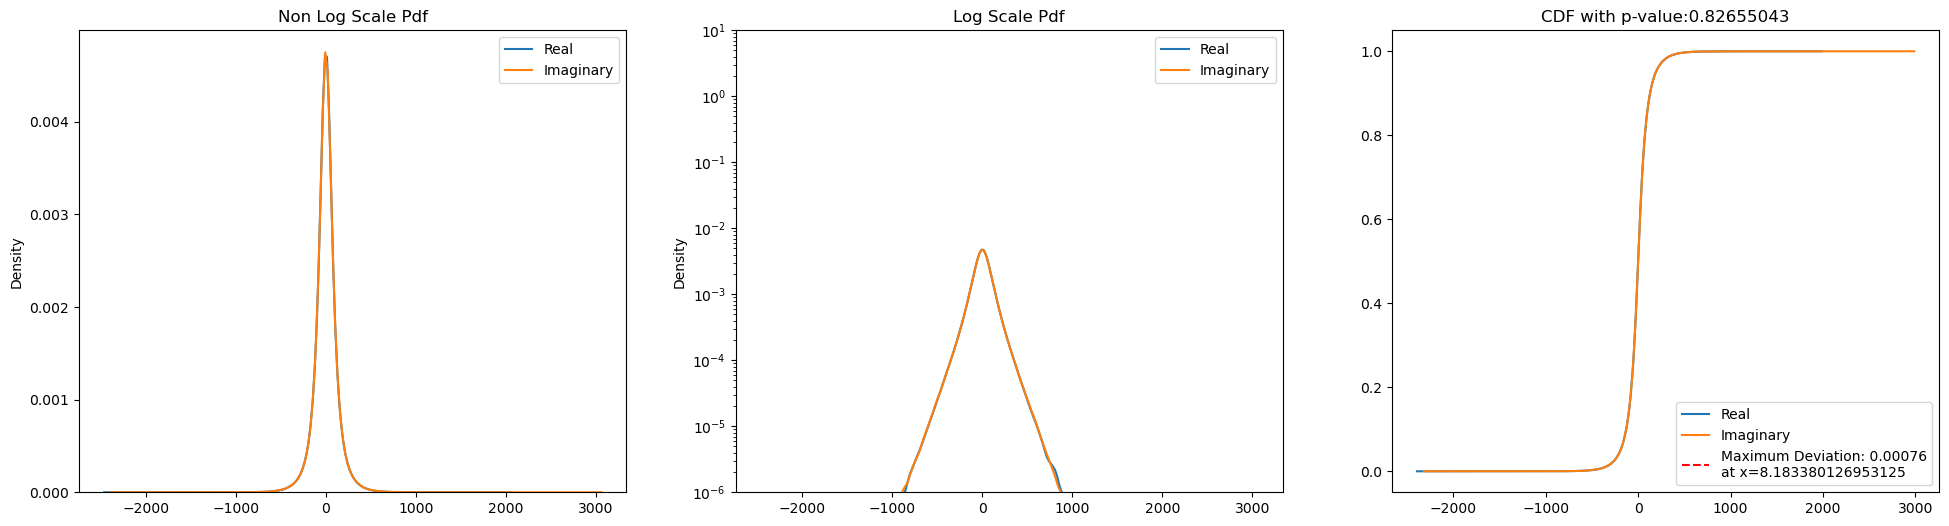

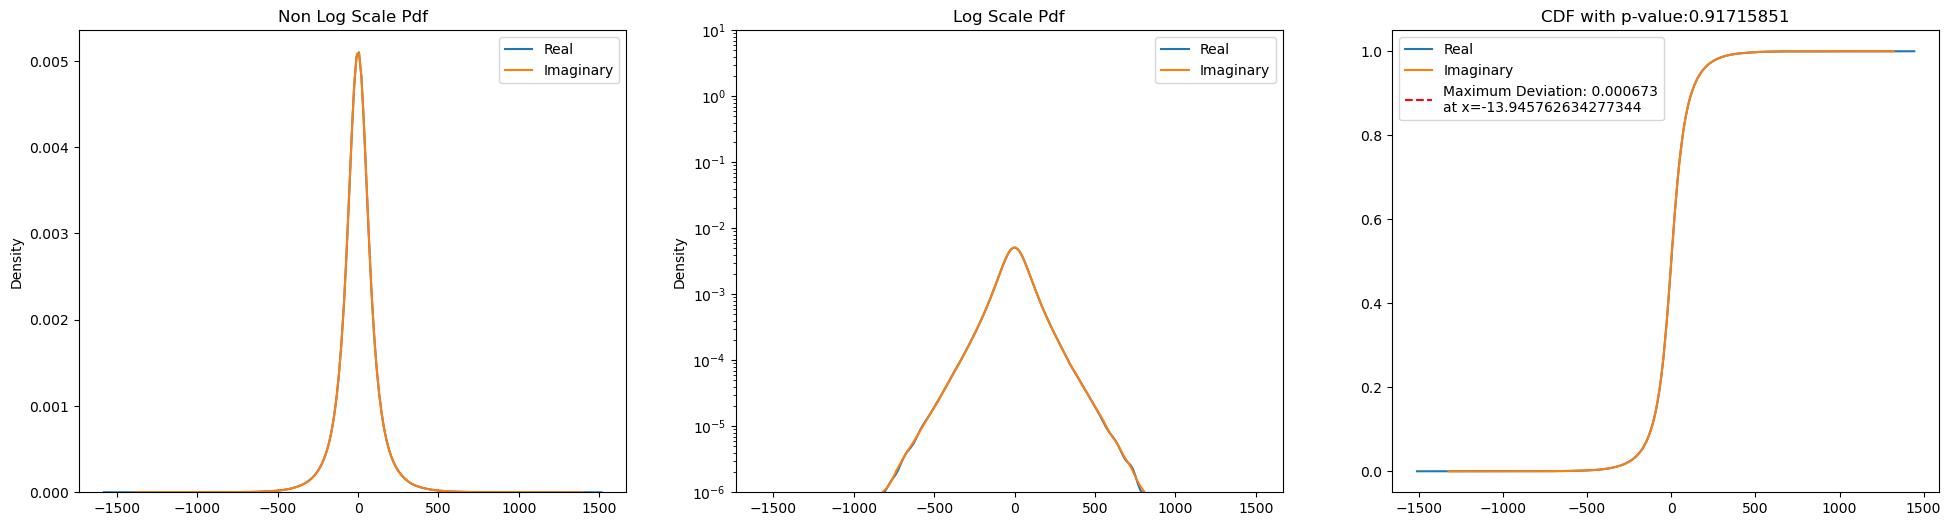

In [14]:
coeffs, mags = convert_fourier_list(data_dir, c = 0, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Green

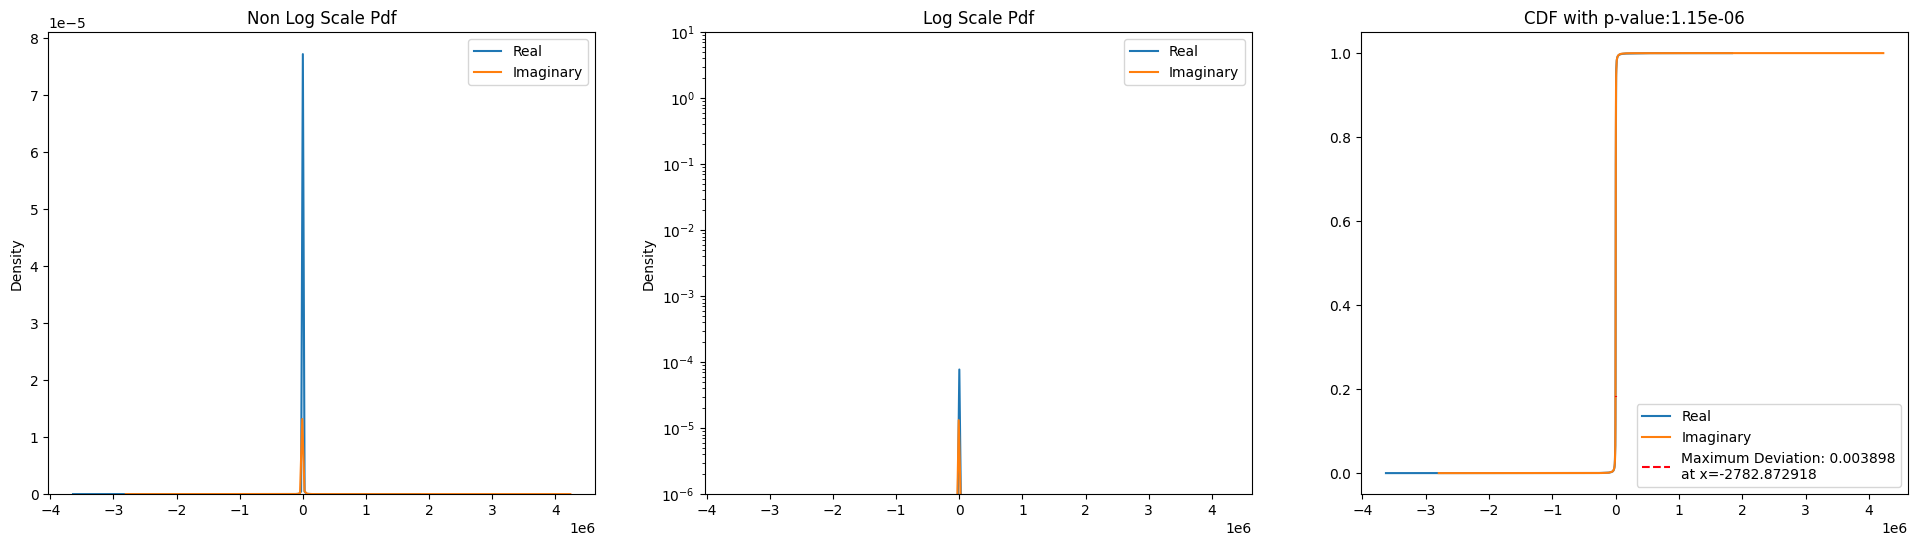

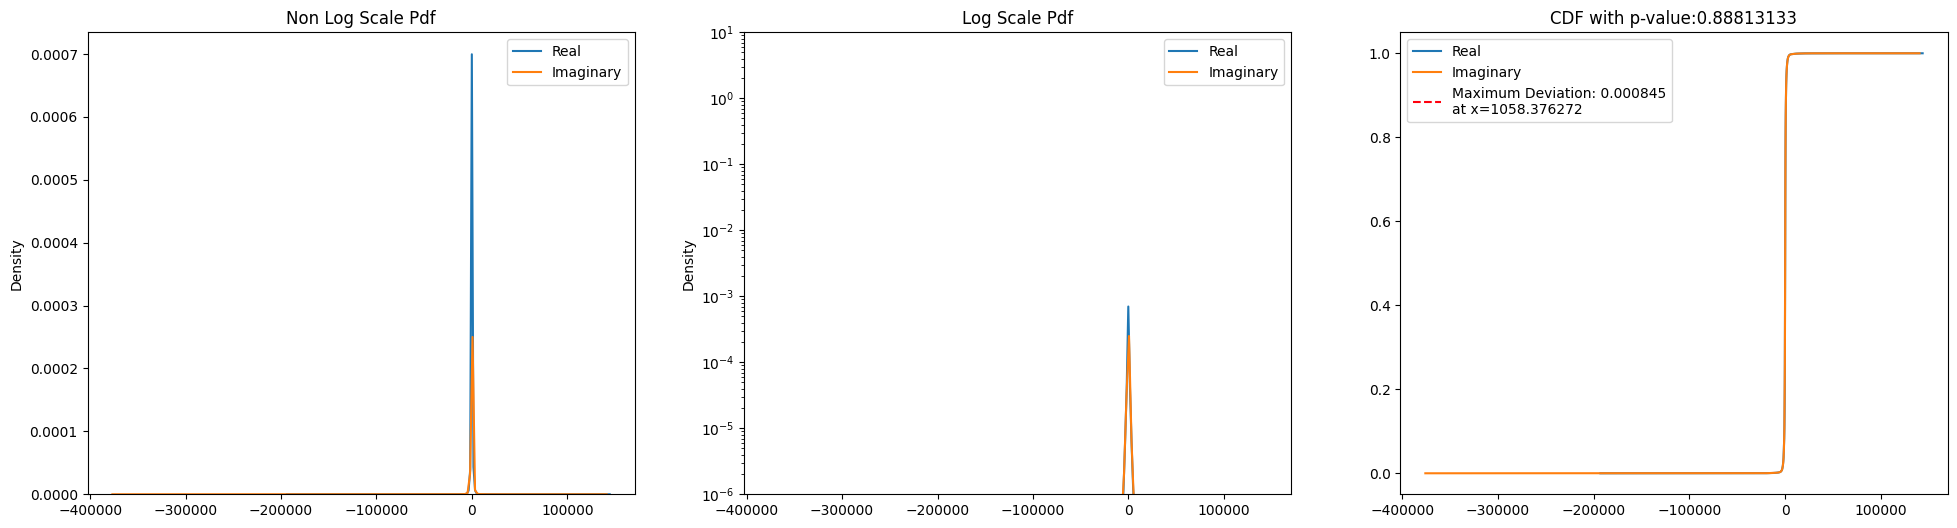

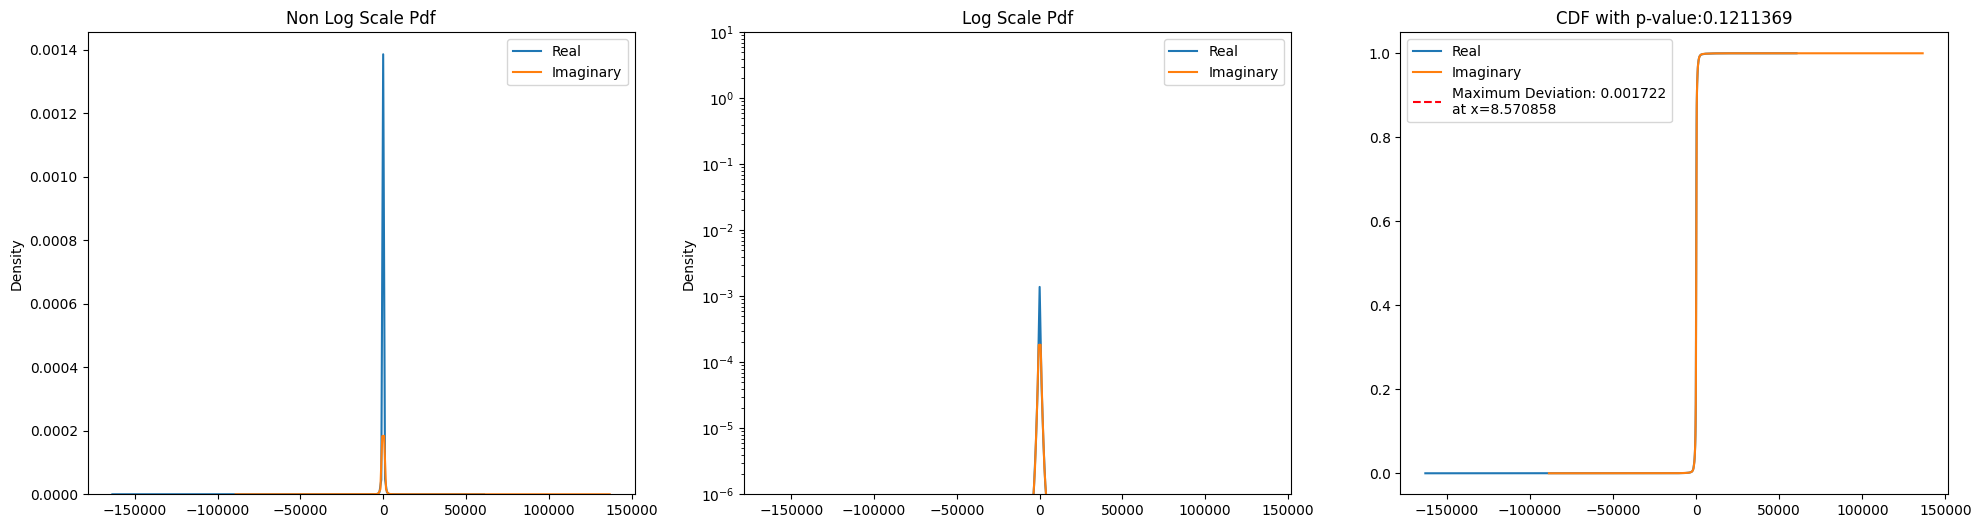

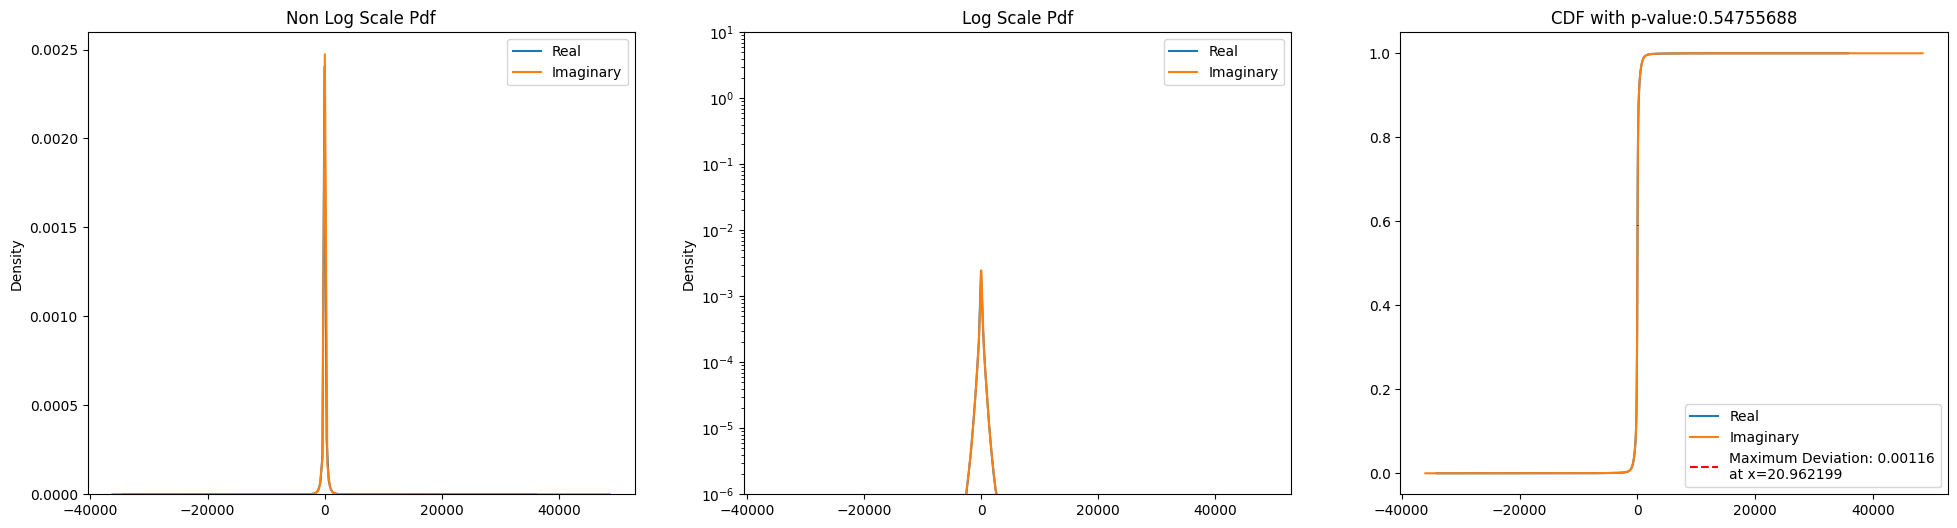

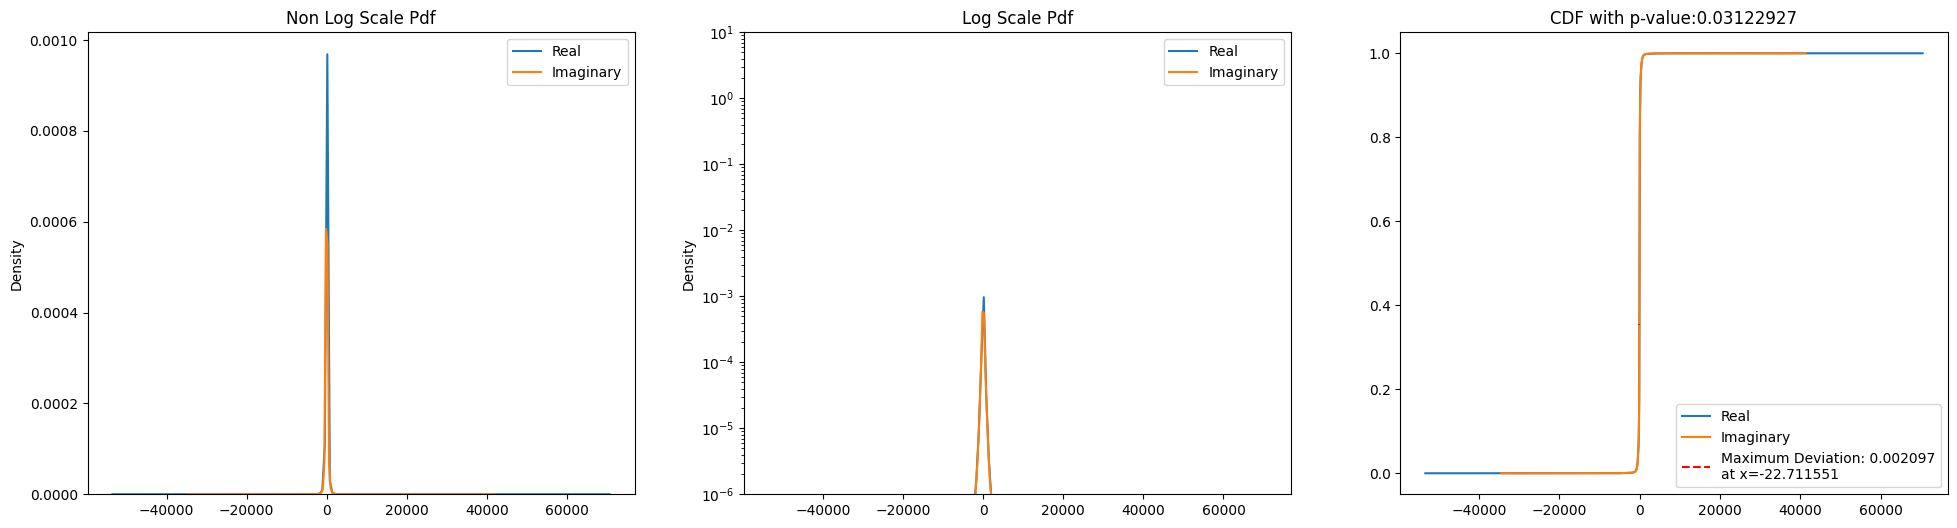

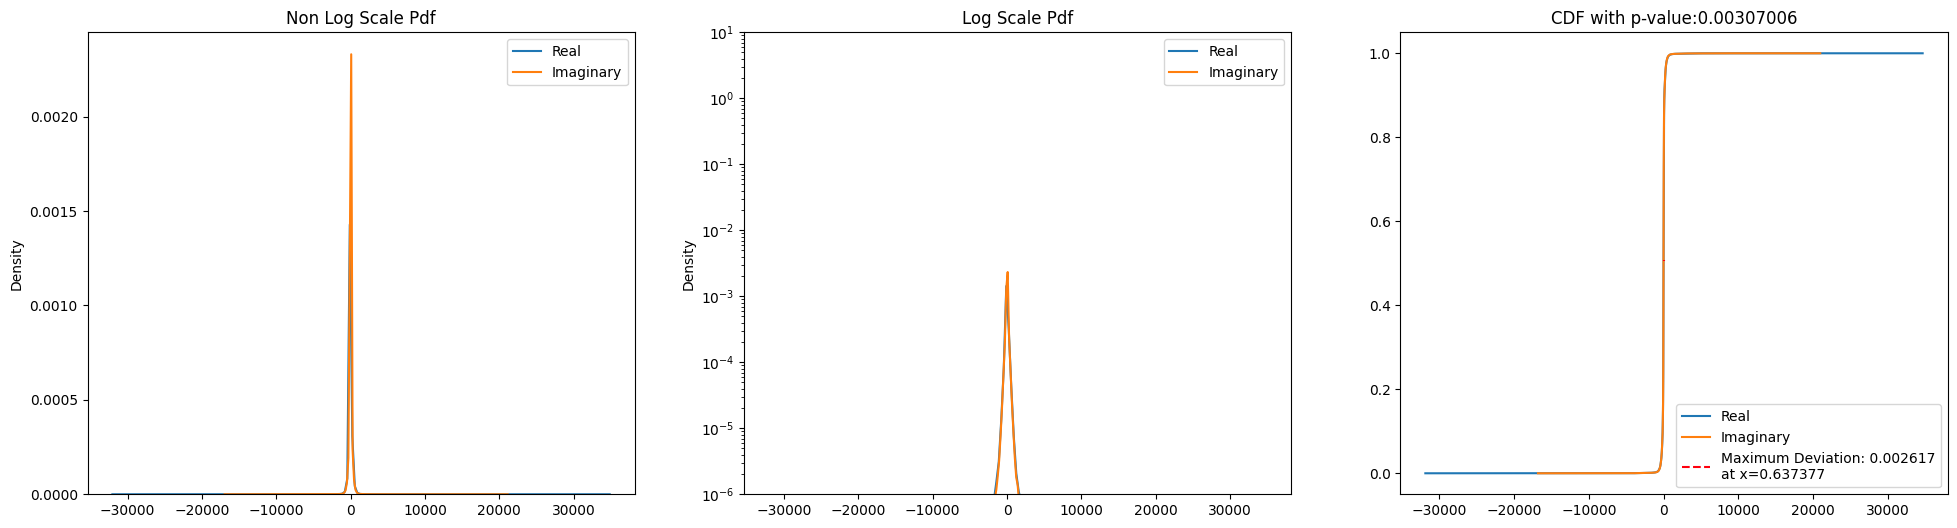

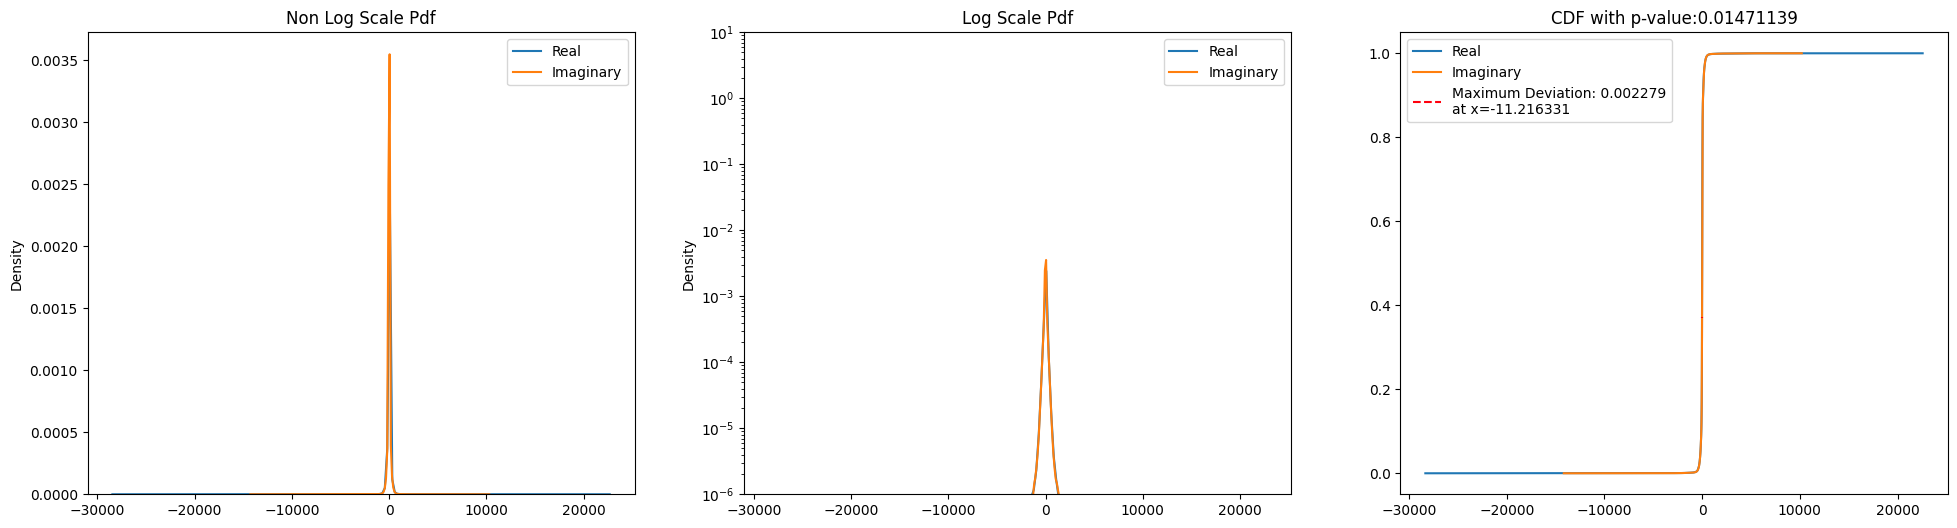

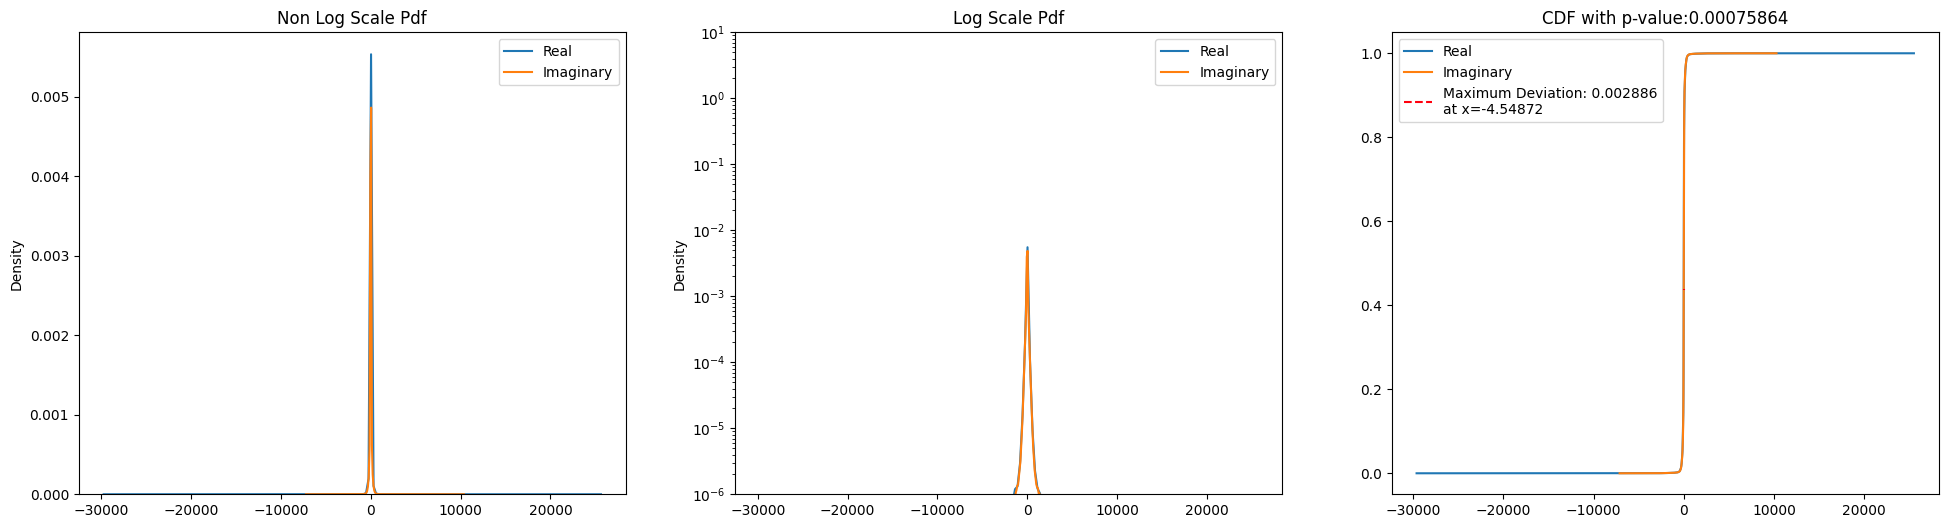

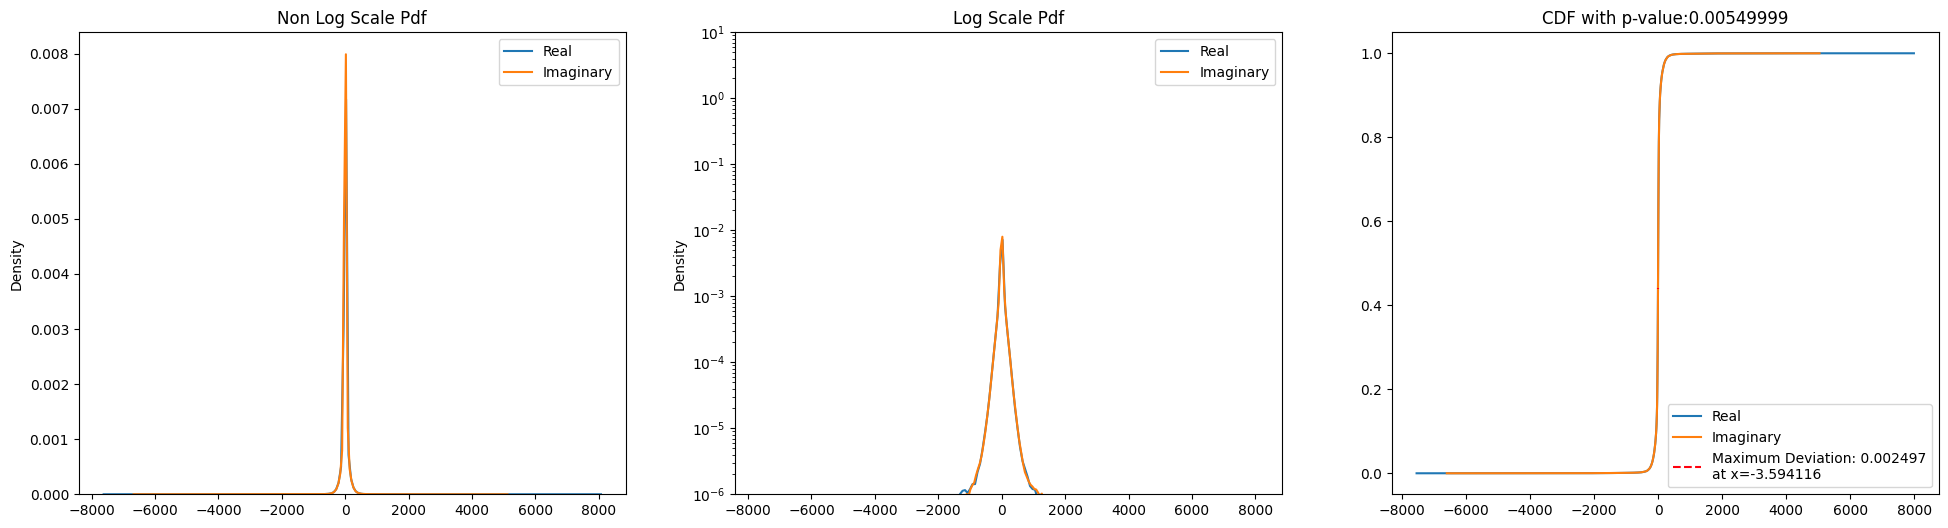

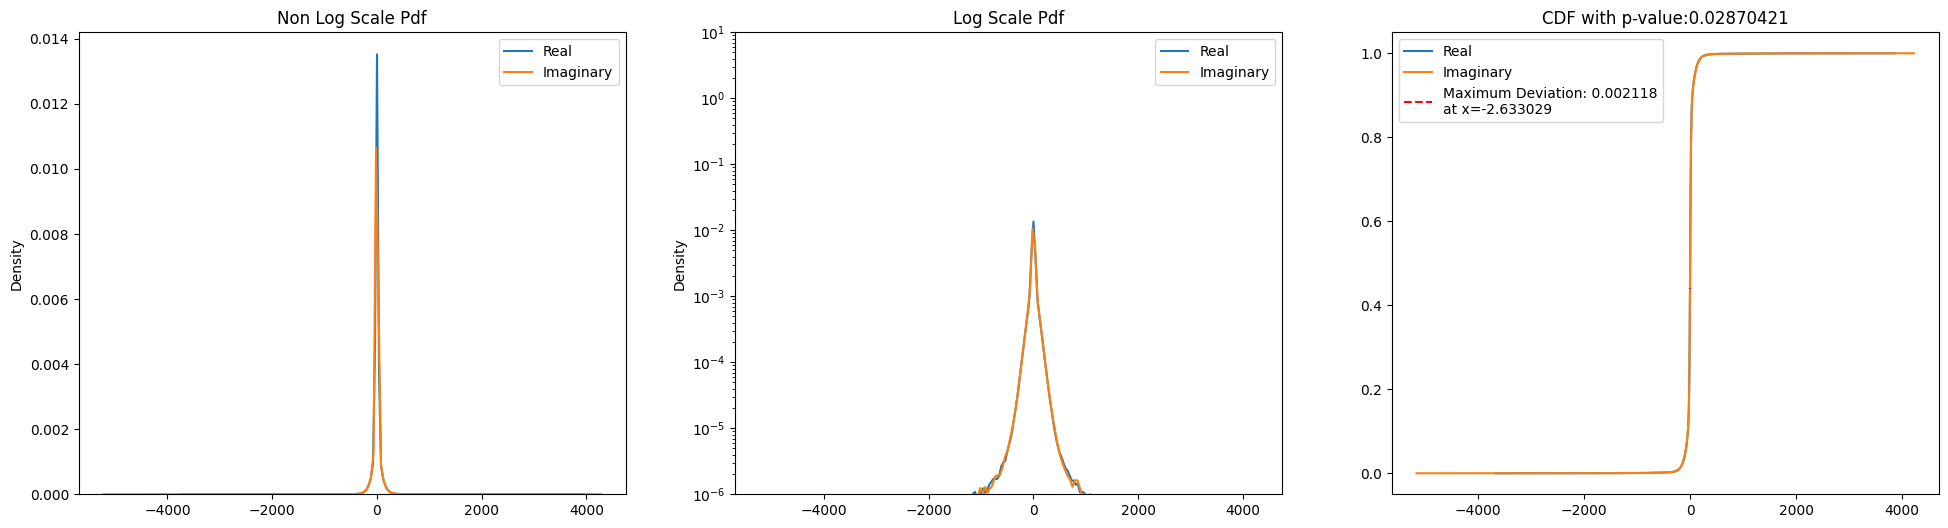

In [7]:
coeffs, mags = convert_fourier_list(data_dir, c = 1, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Blue

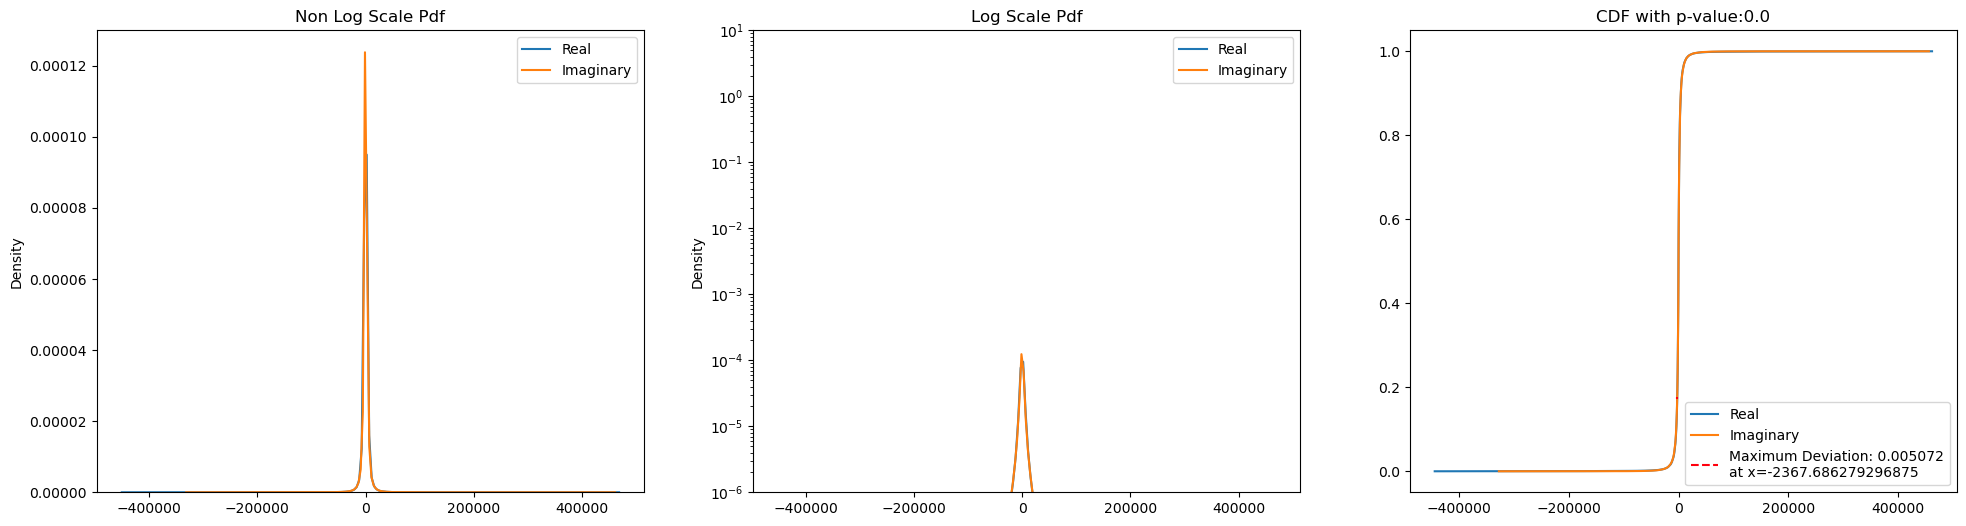

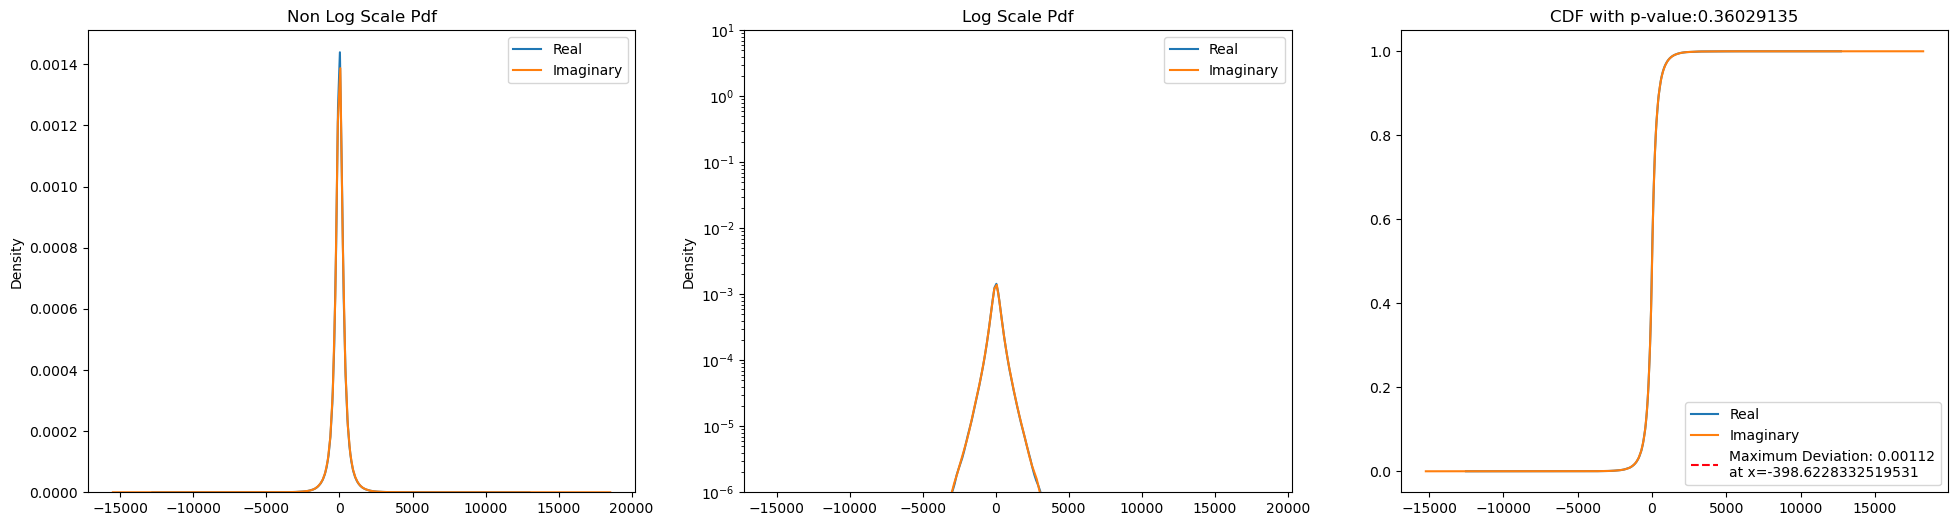

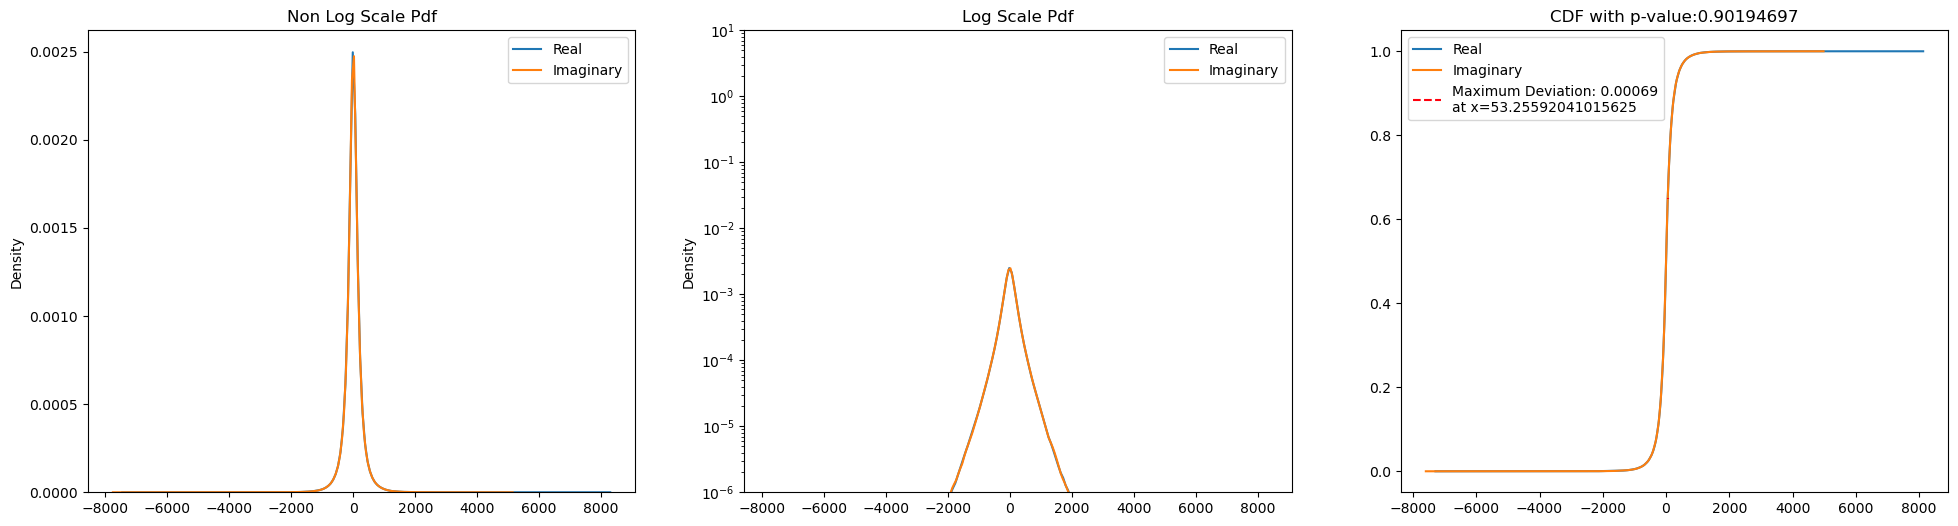

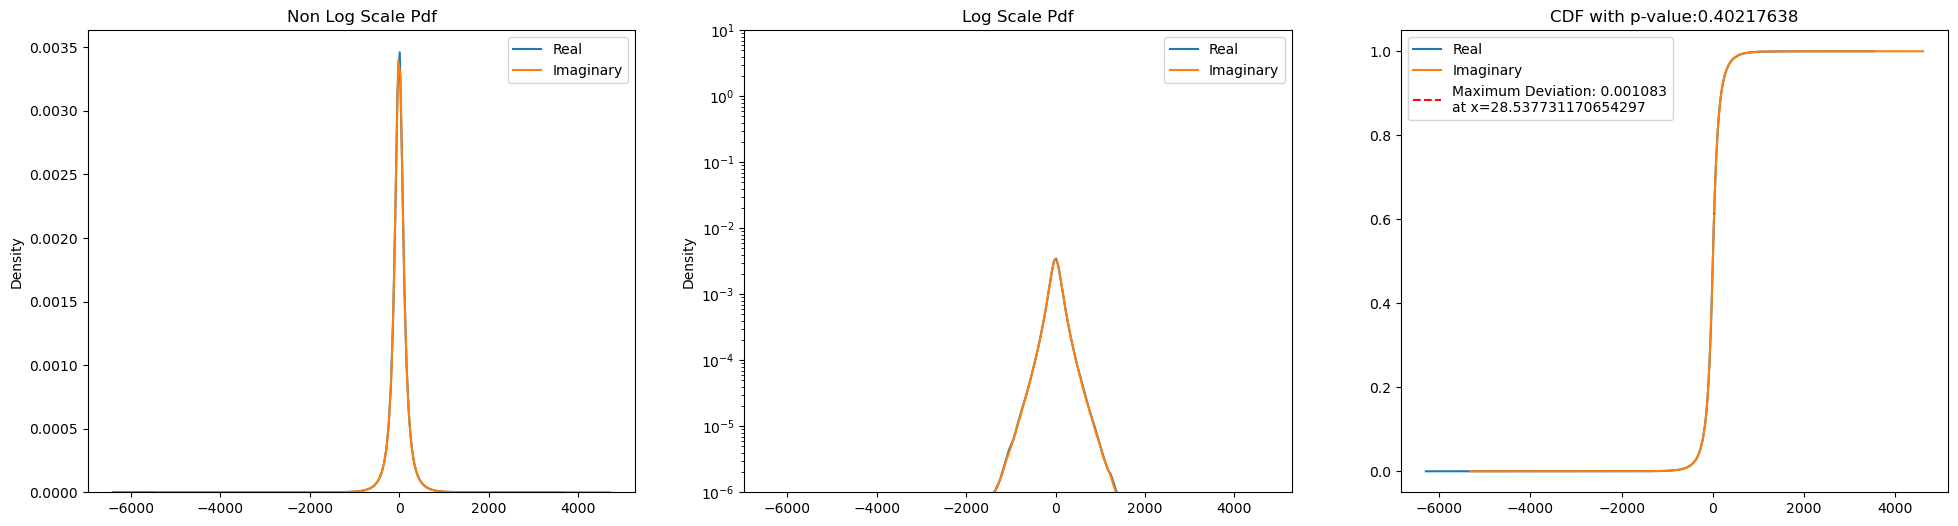

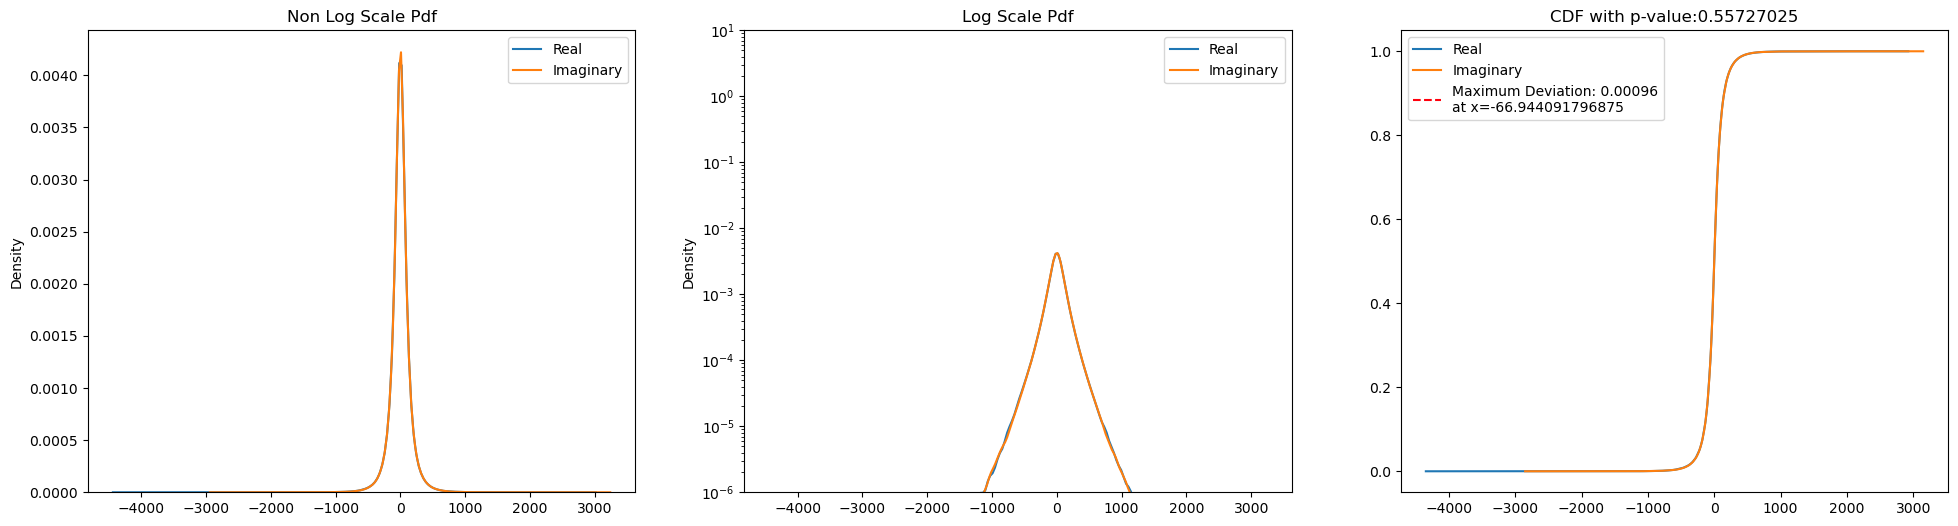

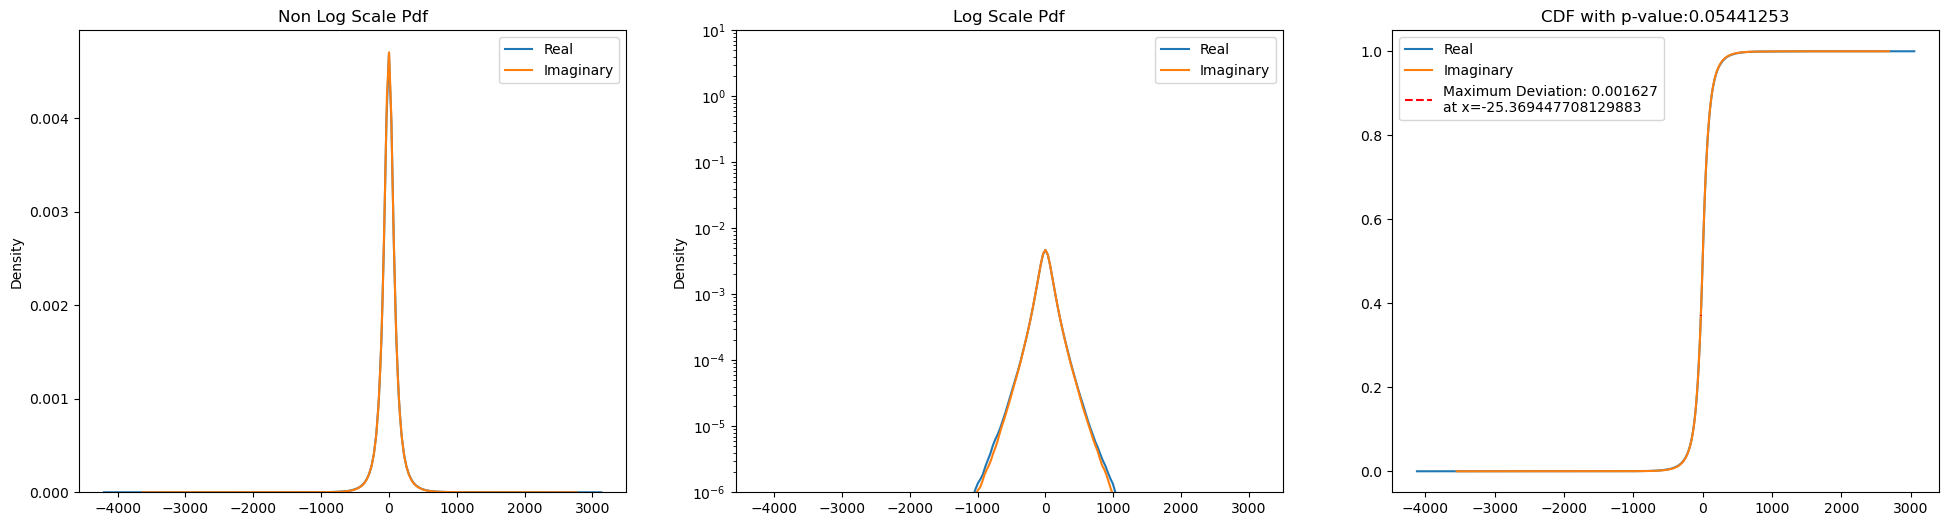

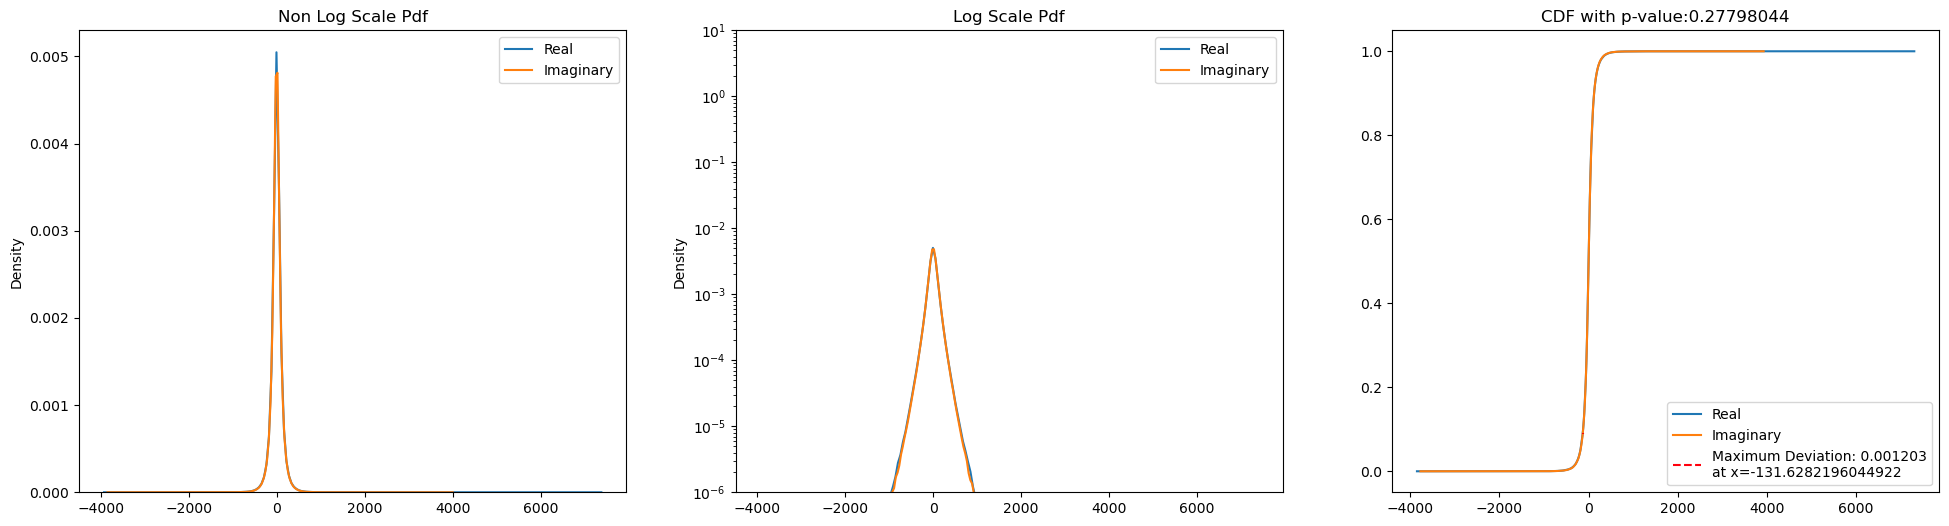

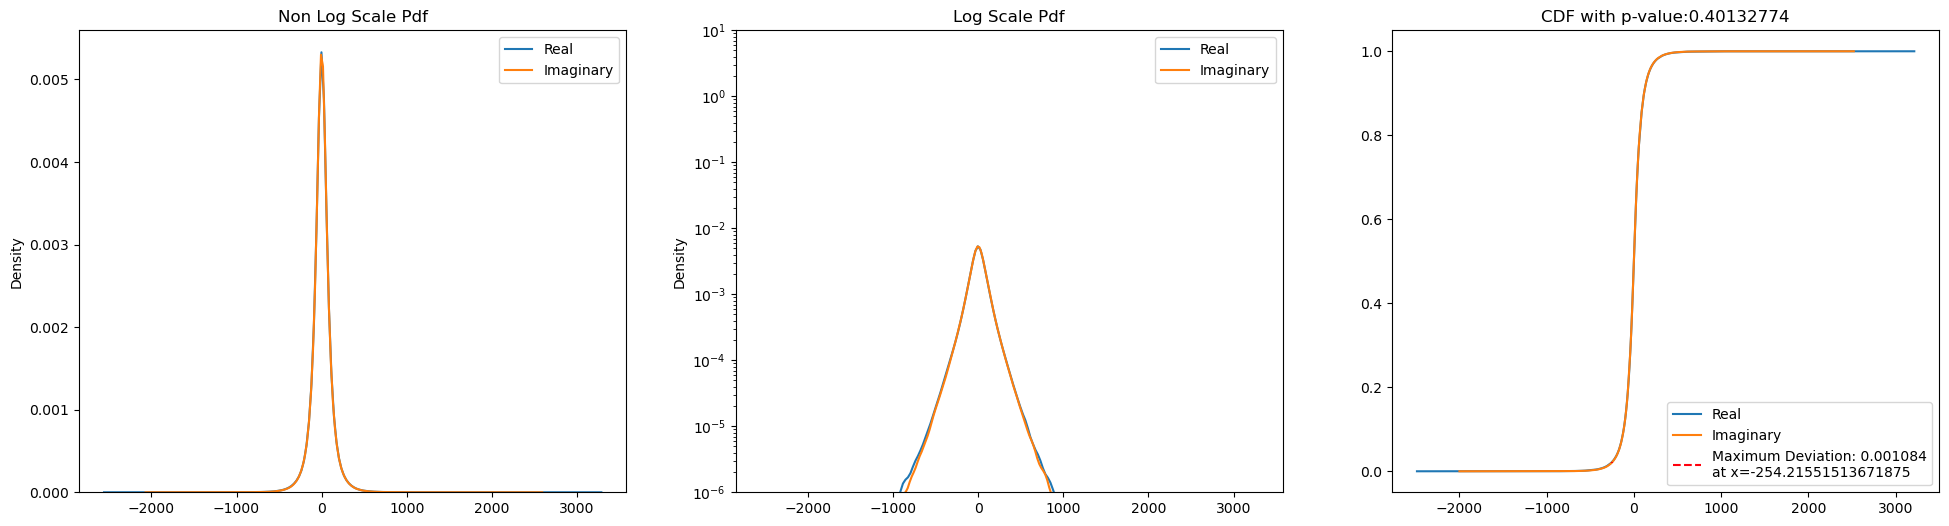

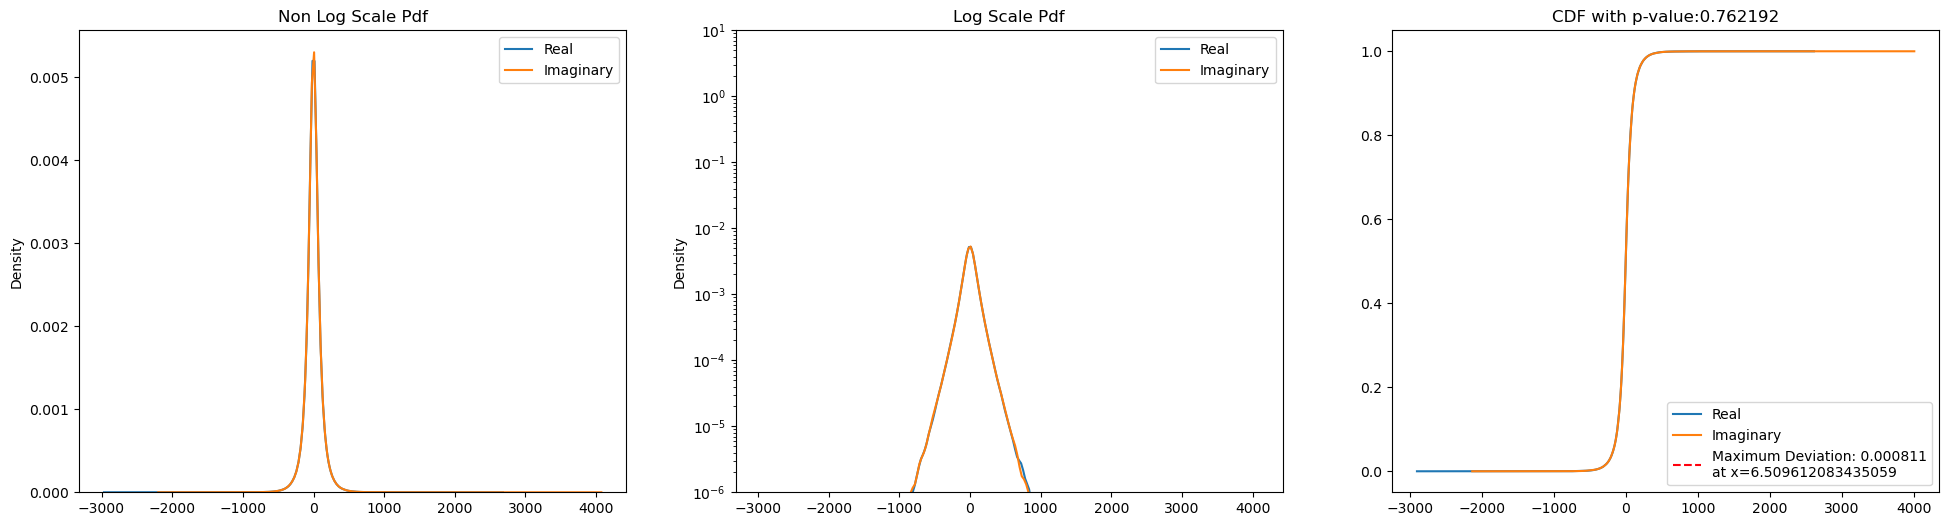

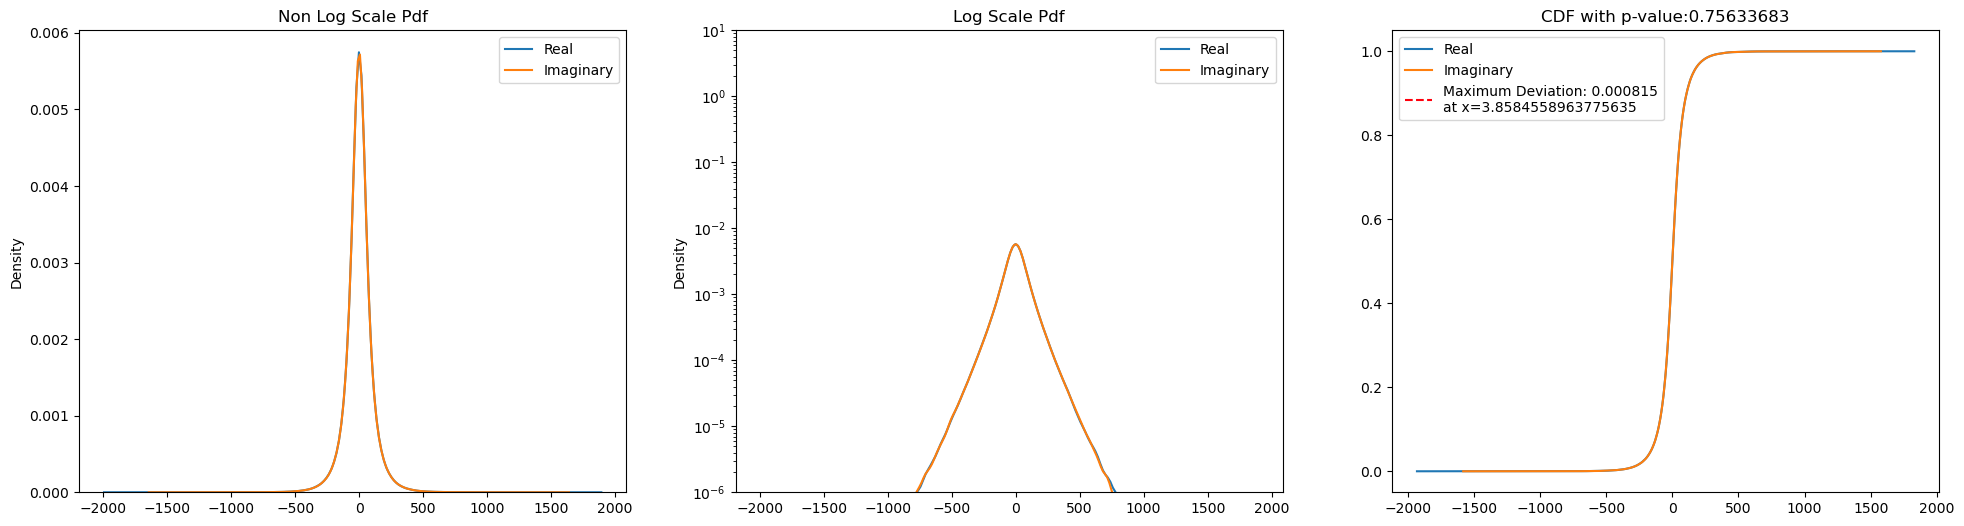

In [4]:
coeffs, mags = convert_fourier_list(data_dir, c = 2, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


In [5]:
n = len(file_list)

# Red

In [6]:
red_converted = convert_to_fourier_basis(data_dir, "red", threshold =0.03, max_depth = 9, image_opener = npz_opener)
red_converted["number_of_coefficents"] = red_converted["data"].apply(lambda x:len(x))/(2 *n)
red_converted



Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.0025 and 0.0025 Recursion Depth of 9
Both Endpoints Are The Same 0.0035355339059327377 and 0.0035355339059327377 Recursion Depth of 9
Both Endpoints Are The Same 0.005 and 0.005 Recursion Depth of 9
Both Endpoints Are The Same 0.005590169943749474 and 0.005590169943749474 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.007071067811865475 and 0.007905694150420948


KeyboardInterrupt: 

In [18]:
filtered_red = red_converted[
    red_converted["magnitude_endpoints"].apply(
        lambda x: isinstance(x, (list, tuple)) and len(x) > 0 and isinstance(x[0], (int, float, np.number)) and x[0] > 0.007905694150420948)
     
]

filtered_red

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
6,7,red,"(0.009013878188659973, 0.010606601717798213)",4,"[1183.9636, -7624.4336, 600.5896, 17710.635, -...",7.0
7,8,red,"(0.011180339887498949, 0.013462912017836262)",4,"[-1582.5762, -3120.0176, 3747.4946, -8780.537,...",10.0
8,9,red,"(0.01414213562373095, 0.016007810593582122)",6,"[-1060.9664, 732.4988, 2473.1401, 15227.0, 951...",11.0
9,10,red,"(0.016770509831248424, 0.02150581316760657)",13,"[182.98207, 2794.2583, -1329.3208, 9261.797, -...",28.0
10,11,red,"(0.022360679774997897, 0.027613402542968152)",18,"[-1069.0597, -1498.7051, -9731.122, 4840.1797,...",39.0
11,12,red,"(0.02795084971874737, 0.03288236609491477)",20,"[-674.2927, -452.36475, 646.4106, 157.7196, 26...",44.0
12,13,red,"(0.03335416016031584, 0.03824264635194589)",21,"[-2287.1006, -159.68091, 1010.7595, -2081.1445...",51.0
13,14,red,"(0.03881043674065006, 0.043732139211339754)",26,"[684.2406, -597.4889, 304.1497, -329.61896, -2...",58.0
14,15,red,"(0.044229515032385334, 0.05505678886386311)",64,"[1212.9075, -266.48602, -3318.4048, -1733.9447...",145.0
15,16,red,"(0.055226805085936304, 0.06604922406811453)",70,"[-1258.1997, -263.86087, 684.09753, -1927.7937...",173.0


 
0.1861 x - 5.709


/var/folders/cg/nwm9l18x22zc8_fj15gvgg2h0000gp/T/ipykernel_28933/3188334889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_red["magnitude_length"] = filtered_red["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


np.float64(1.2045825053069388)

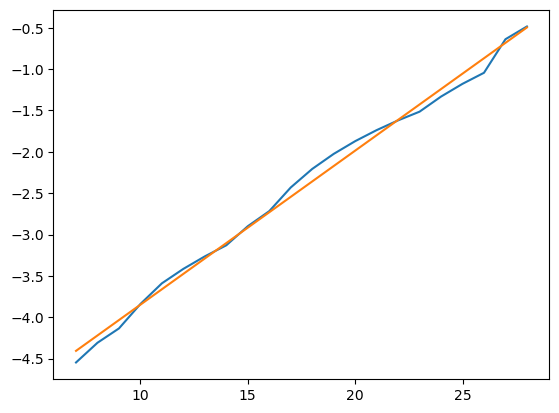

In [ ]:
filtered_red["magnitude_length"] = filtered_red["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_red["band"].to_numpy()
y = filtered_red["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Green

In [20]:
green_converted = convert_to_fourier_basis(data_dir, "green", threshold =0.03, max_depth = 9, image_opener = npz_opener)
green_converted["number_of_coefficents"] = green_converted["data"].apply(lambda x:len(x))/(2 *n)
green_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.0025 and 0.0025 Recursion Depth of 9
Both Endpoints Are The Same 0.0035355339059327377 and 0.0035355339059327377 Recursion Depth of 9
Both Endpoints Are The Same 0.005 and 0.005 Recursion Depth of 9
Both Endpoints Are The Same 0.005590169943749474 and 0.005590169943749474 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.007071067811865475 and 0.007905694150420948
[0.00125    0.0025     0.00426777 0.0053033  0.00674793 0.00809839
 0.01075291 0.01359408 0.01634308 0.02186607 0.02762152 0.03304641
 0.03854315 0.04396376 0.05513937 0.06607852 0.08793641 0.11000116
 0.1319712  0.15393831 0.17587282 0.21990173 0.26385365 0.30780557
 0.35178562 0.52768066 0.61563335]


,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,green,"(0.0, 0.0)",1,"[-241985.28, -93609.14, 50907.438, 155699.75, ...",1.0
1,2,green,"(None, None)",0,[],0.0
2,3,green,"(0.0025, 0.0035355339059327377)",2,"[-27227.781, 9390.843, 34009.79, 8739.975, 685...",3.0
3,4,green,"(0.005, 0.005)",1,"[-13058.203, 2430.6995, 9182.974, -1104.99, -4...",2.0
4,5,green,"(0.005590169943749474, 0.005590169943749474)",1,"[6798.909, -1389.5212, 35218.61, 22319.395, -1...",2.0
5,6,green,"(0.007071067811865475, 0.007905694150420948)",3,"[-2509.0571, -7720.262, -30146.916, 24482.912,...",5.0
6,7,green,"(0.009013878188659973, 0.010606601717798213)",4,"[2984.4458, -8057.0024, -3461.5237, 16566.459,...",7.0
7,8,green,"(0.011180339887498949, 0.013462912017836262)",4,"[-2009.4048, -2990.0815, 4617.9043, -8877.848,...",10.0
8,9,green,"(0.01414213562373095, 0.016007810593582122)",6,"[-1732.0713, 1114.8064, 1856.2937, 15112.364, ...",11.0
9,10,green,"(0.016770509831248424, 0.02150581316760657)",13,"[1531.0635, 3512.4905, 658.26855, 8730.363, -2...",28.0


In [22]:
filtered_green = green_converted[
    green_converted["magnitude_endpoints"].apply(
        lambda x: isinstance(x, (list, tuple)) and len(x) > 0 and isinstance(x[0], (int, float, np.number)) and x[0] > 0.007905694150420948)
     
]

filtered_green

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
6,7,green,"(0.009013878188659973, 0.010606601717798213)",4,"[2984.4458, -8057.0024, -3461.5237, 16566.459,...",7.0
7,8,green,"(0.011180339887498949, 0.013462912017836262)",4,"[-2009.4048, -2990.0815, 4617.9043, -8877.848,...",10.0
8,9,green,"(0.01414213562373095, 0.016007810593582122)",6,"[-1732.0713, 1114.8064, 1856.2937, 15112.364, ...",11.0
9,10,green,"(0.016770509831248424, 0.02150581316760657)",13,"[1531.0635, 3512.4905, 658.26855, 8730.363, -2...",28.0
10,11,green,"(0.022360679774997897, 0.027613402542968152)",18,"[-2078.147, -1422.4414, -9960.309, 5743.134, -...",39.0
11,12,green,"(0.02795084971874737, 0.03288236609491477)",20,"[-447.4666, -390.4168, 996.8895, 195.57907, 12...",44.0
12,13,green,"(0.03335416016031584, 0.03824264635194589)",21,"[-2903.162, -239.91594, 1472.3666, -1623.2385,...",51.0
13,14,green,"(0.03881043674065006, 0.043732139211339754)",26,"[297.86768, -553.088, -121.24693, -455.02832, ...",58.0
14,15,green,"(0.044229515032385334, 0.05505678886386311)",64,"[1295.0564, -228.1614, -3467.3735, -1363.2229,...",145.0
15,16,green,"(0.055226805085936304, 0.06604922406811453)",70,"[-1617.2539, -254.38506, 544.65344, -1865.1793...",173.0


 
0.1976 x - 5.85


/var/folders/cg/nwm9l18x22zc8_fj15gvgg2h0000gp/T/ipykernel_28933/2316274128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_green["magnitude_length"] = filtered_green["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


np.float64(1.2184721541332184)

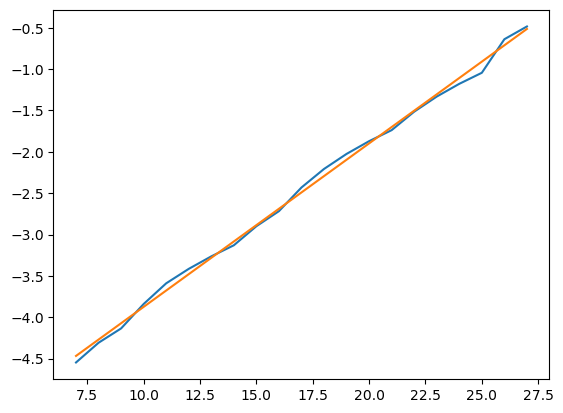

In [ ]:

filtered_green["magnitude_length"] = filtered_green["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_green["band"].to_numpy()
y = filtered_green["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Blue

In [6]:
blue_converted = convert_to_fourier_basis(data_dir, "blue", threshold =0.03, max_depth = 9, image_opener = npz_opener)
blue_converted["number_of_coefficents"] = blue_converted["data"].apply(lambda x:len(x))/(2 *n)
blue_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.0025 and 0.0025 Recursion Depth of 9
Both Endpoints Are The Same 0.0035355339059327377 and 0.0035355339059327377 Recursion Depth of 9
Both Endpoints Are The Same 0.005 and 0.005 Recursion Depth of 9
Both Endpoints Are The Same 0.005590169943749474 and 0.005590169943749474 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.007071067811865475 and 0.007905694150420948
[0.00125    0.0025     0.00426777 0.0053033  0.00674793 0.00809839
 0.01075291 0.01359408 0.01634308 0.02186607 0.02762152 0.03304641
 0.03854315 0.04396376 0.05513937 0.06607852 0.08793641 0.11000116
 0.1319712  0.15393831 0.17587282 0.19789556 0.21990173 0.26385365
 0.30780557 0.35178562 0.52768066 0.61563335]


,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,blue,"(0.0, 0.0)",1,"[-235394.38, -95414.47, 41927.14, 161107.16, -...",1.0
1,2,blue,"(None, None)",0,[],0.0
2,3,blue,"(0.0025, 0.0035355339059327377)",2,"[-14394.782, 14141.104, 25519.457, 5813.542, 5...",3.0
3,4,blue,"(0.005, 0.005)",1,"[-2165.2197, 2339.908, 5896.1074, -3229.08, -6...",2.0
4,5,blue,"(0.005590169943749474, 0.005590169943749474)",1,"[1608.8745, -3395.8062, 30173.234, 19612.727, ...",2.0
5,6,blue,"(0.007071067811865475, 0.007905694150420948)",3,"[-1153.4497, -9806.682, -24561.057, 17454.355,...",5.0
6,7,blue,"(0.009013878188659973, 0.010606601717798213)",4,"[1516.748, -8982.9375, -1112.377, 20238.117, -...",7.0
7,8,blue,"(0.011180339887498949, 0.013462912017836262)",4,"[-1424.0557, -3558.2861, 4503.3486, -5744.2964...",10.0
8,9,blue,"(0.01414213562373095, 0.016007810593582122)",6,"[-1399.3413, 862.40076, 798.72595, 12487.229, ...",11.0
9,10,blue,"(0.016770509831248424, 0.02150581316760657)",13,"[-667.18994, 2720.7517, -412.87988, 7567.353, ...",28.0


In [9]:
filtered_blue = blue_converted[
    blue_converted["magnitude_endpoints"].apply(
        lambda x: isinstance(x, (list, tuple)) and len(x) > 0 and isinstance(x[0], (int, float, np.number)) and x[0] > 0.007905694150420948)
     
]
filtered_blue

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
6,7,blue,"(0.009013878188659973, 0.010606601717798213)",4,"[1516.748, -8982.9375, -1112.377, 20238.117, -...",7.0
7,8,blue,"(0.011180339887498949, 0.013462912017836262)",4,"[-1424.0557, -3558.2861, 4503.3486, -5744.2964...",10.0
8,9,blue,"(0.01414213562373095, 0.016007810593582122)",6,"[-1399.3413, 862.40076, 798.72595, 12487.229, ...",11.0
9,10,blue,"(0.016770509831248424, 0.02150581316760657)",13,"[-667.18994, 2720.7517, -412.87988, 7567.353, ...",28.0
10,11,blue,"(0.022360679774997897, 0.027613402542968152)",18,"[-1504.9924, -998.81537, -8155.809, 4815.925, ...",39.0
11,12,blue,"(0.02795084971874737, 0.03288236609491477)",20,"[-751.14496, -582.38574, 740.3087, 953.3851, 2...",44.0
12,13,blue,"(0.03335416016031584, 0.03824264635194589)",21,"[-1926.009, -298.97662, 1510.3933, -1025.1816,...",51.0
13,14,blue,"(0.03881043674065006, 0.043732139211339754)",26,"[838.7357, -555.7912, -12.603298, -1000.28845,...",58.0
14,15,blue,"(0.044229515032385334, 0.05505678886386311)",64,"[781.8557, -250.18085, -2947.6162, -1041.881, ...",145.0
15,16,blue,"(0.055226805085936304, 0.06604922406811453)",70,"[-1114.4003, -376.34903, 491.51373, -1741.6444...",173.0


 
0.1861 x - 5.709


/var/folders/cg/nwm9l18x22zc8_fj15gvgg2h0000gp/T/ipykernel_1052/2914614885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_blue["magnitude_length"] = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


np.float64(1.2045825053069388)

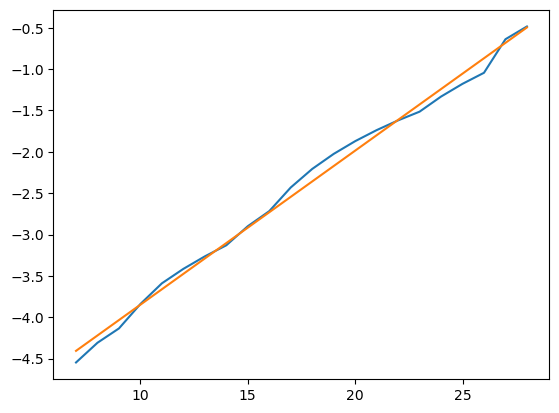

In [ ]:
filtered_blue["magnitude_length"] = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_blue["band"].to_numpy()
y = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Gray

In [11]:
gray_converted = convert_to_fourier_basis(data_dir, "gray", threshold =0.03, max_depth = 9, image_opener = npz_opener)
gray_converted["number_of_coefficents"] = gray_converted["data"].apply(lambda x:len(x))/(2 *n)
gray_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.0025 and 0.0025 Recursion Depth of 9
Both Endpoints Are The Same 0.0035355339059327377 and 0.0035355339059327377 Recursion Depth of 9
Both Endpoints Are The Same 0.005 and 0.005 Recursion Depth of 9
Both Endpoints Are The Same 0.005590169943749474 and 0.005590169943749474 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.007071067811865475 and 0.007905694150420948
[0.00125    0.0025     0.00426777 0.0053033  0.00674793 0.00809839
 0.01075291 0.01359408 0.01634308 0.02186607 0.02762152 0.03304641
 0.03854315 0.04396376 0.05513937 0.06607852 0.08793641 0.11000116
 0.1319712  0.15393831 0.17587282 0.19789556 0.21990173 0.26385365
 0.30780557 0.35178562 0.52768066 0.61563335]


,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,gray,"(0.0, 0.0)",1,"[-236246.84936129604, -92253.20943942029, 5440...",1.0
1,2,gray,"(None, None)",0,[],0.0
2,3,gray,"(0.0025, 0.0035355339059327377)",2,"[-21884.440777103075, 10217.295336007464, 3158...",3.0
3,4,gray,"(0.005, 0.005)",1,"[-9210.054848957268, 2234.7700689657763, 7482....",2.0
4,5,gray,"(0.005590169943749474, 0.005590169943749474)",1,"[4918.840094992924, -1601.5416401093664, 34609...",2.0
5,6,gray,"(0.007071067811865475, 0.007905694150420948)",3,"[-2022.7775896390112, -8002.634858574356, -279...",5.0
6,7,gray,"(0.009013878188659973, 0.010606601717798213)",4,"[2278.665535828136, -8032.458520327631, -1979....",7.0
7,8,gray,"(0.011180339887498949, 0.013462912017836262)",4,"[-1814.8950446699816, -3093.395631401825, 4344...",10.0
8,9,gray,"(0.01414213562373095, 0.016007810593582122)",6,"[-1493.3735515986268, 971.6488411194922, 1919....",11.0
9,10,gray,"(0.016770509831248424, 0.02150581316760657)",13,"[877.3679961450857, 3207.2014563568755, -57.99...",28.0


In [13]:
filtered_gray = gray_converted[
    gray_converted["magnitude_endpoints"].apply(
        lambda x: isinstance(x, (list, tuple)) and len(x) > 0 and isinstance(x[0], (int, float, np.number)) and x[0] > 0.007905694150420948)
     
]

filtered_gray

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
6,7,gray,"(0.009013878188659973, 0.010606601717798213)",4,"[2278.665535828136, -8032.458520327631, -1979....",7.0
7,8,gray,"(0.011180339887498949, 0.013462912017836262)",4,"[-1814.8950446699816, -3093.395631401825, 4344...",10.0
8,9,gray,"(0.01414213562373095, 0.016007810593582122)",6,"[-1493.3735515986268, 971.6488411194922, 1919....",11.0
9,10,gray,"(0.016770509831248424, 0.02150581316760657)",13,"[877.3679961450857, 3207.2014563568755, -57.99...",28.0
10,11,gray,"(0.022360679774997897, 0.027613402542968152)",18,"[-1710.983455619495, -1396.8010402932725, -968...",39.0
11,12,gray,"(0.02795084971874737, 0.03288236609491477)",20,"[-549.8393937390479, -430.7785037424744, 862.7...",44.0
12,13,gray,"(0.03335416016031584, 0.03824264635194589)",21,"[-2607.335271090503, -222.64256349930758, 1338...",51.0
13,14,gray,"(0.03881043674065006, 0.043732139211339754)",26,"[474.98368062051054, -566.6122750643915, 18.30...",58.0
14,15,gray,"(0.044229515032385334, 0.05505678886386311)",64,"[1211.8677019697247, -242.1040274649626, -3363...",145.0
15,16,gray,"(0.055226805085936304, 0.06604922406811453)",70,"[-1452.4454591953718, -271.0957373502338, 580....",173.0


 
0.1861 x - 5.709


/var/folders/cg/nwm9l18x22zc8_fj15gvgg2h0000gp/T/ipykernel_1052/804269327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gray["magnitude_length"] = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


np.float64(1.2045825053069388)

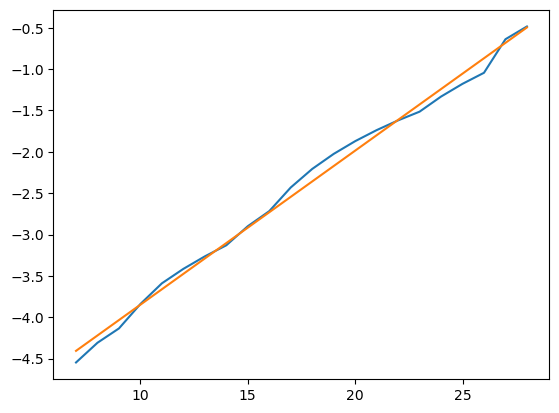

In [ ]:
filtered_gray["magnitude_length"] = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_gray["band"].to_numpy()
y = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

In [15]:
splits = getSplits(0.009013878188659973,0.6155586893221474, 1.204)
splits

[0.009013878188659973,
 0.010852709339146607,
 0.013066662044332515,
 0.015732261101376346,
 0.01894164236605712,
 0.022805737408732773,
 0.02745810784011426,
 0.03305956183949756,
 0.039803712454755065,
 0.0479236697955251,
 0.05770009843381222,
 0.0694709185143099,
 0.08364298589122912,
 0.10070615501303985,
 0.12125021063569998,
 0.14598525360538275,
 0.17576624534088084,
 0.21162255939042052,
 0.2547935615060663,
 0.3067714480533038,
 0.36935282345617776,
 0.444700799441238,
 0.5354197625272505]

In [16]:
converted_red_with_splits = convert_to_fourier_basis(data_dir, "red", split_list = splits, image_opener = npz_opener)
converted_red_with_splits

[0.00901388 0.01085271 0.01306666 0.01573226 0.01894164 0.02280574
 0.02745811 0.03305956 0.03980371 0.04792367 0.0577001  0.06947092
 0.08364299 0.10070616 0.12125021 0.14598525 0.17576625 0.21162256
 0.25479356 0.30677145 0.36935282 0.4447008  0.53541976]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,red,"(0.0, 0.007905694150420948)",8,"[-225381.5, -88415.5, 66055.734, 139714.08, -4..."
1,2,red,"(0.009013878188659973, 0.010606601717798213)",4,"[1183.9636, -7624.4336, 600.5896, 17710.635, -..."
2,3,red,"(0.011180339887498949, 0.012747548783981964)",3,"[-1582.5762, -3120.0176, 3747.4946, -8780.537,..."
3,4,red,"(0.013462912017836262, 0.01520690632574555)",5,"[-1604.8644, -3262.9646, -8762.021, -5663.167,..."
4,5,red,"(0.015811388300841896, 0.018200274723201296)",7,"[2051.657, -183.48495, -1254.544, -8608.935, 2..."
5,6,red,"(0.01903943276465977, 0.02263846284534354)",11,"[-1836.1052, 754.62384, 9318.189, -412.80478, ..."
6,7,red,"(0.023048861143232218, 0.027041634565979918)",13,"[449.26263, -1812.744, -6480.1436, 1263.5192, ..."
7,8,red,"(0.0275, 0.03288236609491477)",22,"[-1833.7065, -882.6127, 1714.2983, -12145.195,..."
8,9,red,"(0.03335416016031584, 0.03952847075210474)",26,"[-2287.1006, -159.68091, 1010.7595, -2081.1445..."
9,10,red,"(0.04, 0.047762432936357006)",41,"[-1806.0123, 273.06647, 714.21814, -32.42418, ..."


In [17]:
converted_green_with_splits = convert_to_fourier_basis(data_dir, "green", split_list = splits, image_opener = npz_opener)
converted_green_with_splits

[0.00901388 0.01085271 0.01306666 0.01573226 0.01894164 0.02280574
 0.02745811 0.03305956 0.03980371 0.04792367 0.0577001  0.06947092
 0.08364299 0.10070616 0.12125021 0.14598525 0.17576625 0.21162256
 0.25479356 0.30677145 0.36935282 0.4447008  0.53541976]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,green,"(0.0, 0.007905694150420948)",8,"[-241985.28, -93609.14, 50907.438, 155699.75, ..."
1,2,green,"(0.009013878188659973, 0.010606601717798213)",4,"[2984.4458, -8057.0024, -3461.5237, 16566.459,..."
2,3,green,"(0.011180339887498949, 0.012747548783981964)",3,"[-2009.4048, -2990.0815, 4617.9043, -8877.848,..."
3,4,green,"(0.013462912017836262, 0.01520690632574555)",5,"[-3171.9854, -3322.4683, -7803.629, -6461.9443..."
4,5,green,"(0.015811388300841896, 0.018200274723201296)",7,"[2961.0078, -108.25169, -2008.8638, -7558.117,..."
5,6,green,"(0.01903943276465977, 0.02263846284534354)",11,"[-3578.4697, 799.5787, 10638.832, -1169.938, 9..."
6,7,green,"(0.023048861143232218, 0.027041634565979918)",13,"[1153.3718, -1746.3031, -6344.8887, 1314.0569,..."
7,8,green,"(0.0275, 0.03288236609491477)",22,"[-2601.5986, -784.47015, 969.2406, -12227.964,..."
8,9,green,"(0.03335416016031584, 0.03952847075210474)",26,"[-2903.162, -239.91594, 1472.3666, -1623.2385,..."
9,10,green,"(0.04, 0.047762432936357006)",41,"[-2537.3625, 244.59952, 1280.8787, 296.98395, ..."


In [18]:
converted_blue_with_splits = convert_to_fourier_basis(data_dir, "blue", split_list = splits, image_opener = npz_opener)
converted_blue_with_splits

[0.00901388 0.01085271 0.01306666 0.01573226 0.01894164 0.02280574
 0.02745811 0.03305956 0.03980371 0.04792367 0.0577001  0.06947092
 0.08364299 0.10070616 0.12125021 0.14598525 0.17576625 0.21162256
 0.25479356 0.30677145 0.36935282 0.4447008  0.53541976]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,blue,"(0.0, 0.007905694150420948)",8,"[-235394.38, -95414.47, 41927.14, 161107.16, -..."
1,2,blue,"(0.009013878188659973, 0.010606601717798213)",4,"[1516.748, -8982.9375, -1112.377, 20238.117, -..."
2,3,blue,"(0.011180339887498949, 0.012747548783981964)",3,"[-1424.0557, -3558.2861, 4503.3486, -5744.2964..."
3,4,blue,"(0.013462912017836262, 0.01520690632574555)",5,"[-777.6183, -3698.5503, -6166.798, -3189.1292,..."
4,5,blue,"(0.015811388300841896, 0.018200274723201296)",7,"[1559.6675, -1105.499, -858.26324, -6951.5225,..."
5,6,blue,"(0.01903943276465977, 0.02263846284534354)",11,"[-1402.7902, 401.4942, 8347.131, -120.92631, -..."
6,7,blue,"(0.023048861143232218, 0.027041634565979918)",13,"[676.8783, -1642.4675, -3415.7664, 1494.4512, ..."
7,8,blue,"(0.0275, 0.03288236609491477)",22,"[-1746.4485, -633.0519, 1340.2151, -10045.311,..."
8,9,blue,"(0.03335416016031584, 0.03952847075210474)",26,"[-1926.009, -298.97662, 1510.3933, -1025.1816,..."
9,10,blue,"(0.04, 0.047762432936357006)",41,"[-1719.4382, 196.66719, 324.76666, 395.49585, ..."


In [19]:
converted_gray_with_splits = convert_to_fourier_basis(data_dir, "gray", split_list = splits, image_opener = npz_opener)
converted_gray_with_splits

[0.00901388 0.01085271 0.01306666 0.01573226 0.01894164 0.02280574
 0.02745811 0.03305956 0.03980371 0.04792367 0.0577001  0.06947092
 0.08364299 0.10070616 0.12125021 0.14598525 0.17576625 0.21162256
 0.25479356 0.30677145 0.36935282 0.4447008  0.53541976]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,gray,"(0.0, 0.007905694150420948)",8,"[-236246.84936129604, -92253.20943942029, 5440..."
1,2,gray,"(0.009013878188659973, 0.010606601717798213)",4,"[2278.665535828136, -8032.458520327631, -1979...."
2,3,gray,"(0.011180339887498949, 0.012747548783981964)",3,"[-1814.8950446699816, -3093.395631401825, 4344..."
3,4,gray,"(0.013462912017836262, 0.01520690632574555)",5,"[-2430.297845347779, -3347.223775329869, -7902..."
4,5,gray,"(0.015811388300841896, 0.018200274723201296)",7,"[2529.153916172539, -244.41432629859293, -1652..."
5,6,gray,"(0.01903943276465977, 0.02263846284534354)",11,"[-2809.2916111506065, 740.6800861541576, 9981...."
6,7,gray,"(0.023048861143232218, 0.027041634565979918)",13,"[888.4780193513336, -1754.1504427762482, -6050..."
7,8,gray,"(0.0275, 0.03288236609491477)",22,"[-2274.328411014894, -796.4650831598451, 1234...."
8,9,gray,"(0.03335416016031584, 0.03952847075210474)",26,"[-2607.335271090503, -222.64256349930758, 1338..."
9,10,gray,"(0.04, 0.047762432936357006)",41,"[-2225.265647894608, 247.62005849983163, 1002...."
